In [1]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## 1.)Loading the dataset

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ericrlessa/global-illicit-money-transactions/refs/heads/main/Big_Black_Money_Dataset.csv')
df



Transaction ID       Country  Amount (USD)   Transaction Type  \
0      TX0000000001        Brazil  3.267530e+06  Offshore Transfer   
1      TX0000000002         China  4.965767e+06    Stocks Transfer   
2      TX0000000003            UK  9.416750e+04    Stocks Transfer   
3      TX0000000004           UAE  3.864201e+05    Cash Withdrawal   
4      TX0000000005  South Africa  6.433784e+05     Cryptocurrency   
...             ...           ...           ...                ...   
9995   TX0000009996     Singapore  2.209229e+06  Offshore Transfer   
9996   TX0000009997           UAE  4.800338e+06  Property Purchase   
9997   TX0000009998            UK  4.891953e+05    Stocks Transfer   
9998   TX0000009999        Brazil  2.233581e+06  Offshore Transfer   
9999   TX0000010000   Switzerland  3.846778e+05    Stocks Transfer   

      Date of Transaction Person Involved      Industry Destination Country  \
0     2013-01-01 00:00:00     Person_1101  Construction                 USA   
1     2013-01-01 01:00:00     Person_7484  Luxury Goods        South Africa   
2     2013-01-01 02:00:00     Person_3655  Construction         Switzerland   
3     2013-01-01 03:00:00     Person_3226     Oil & Gas              Russia   
4     2013-01-01 04:00:00     Person_7975   Real Estate                 USA   
...                   ...             ...           ...                 ...   
9995  2014-02-21 11:00:00     Person_6896   Real Estate              Brazil   
9996  2014-02-21 12:00:00     Person_6348  Luxury Goods              Russia   
9997  2014-02-21 13:00:00     Person_4171     Oil & Gas              Russia   
9998  2014-02-21 14:00:00     Person_2799   Real Estate              Russia   
9999  2014-02-21 15:00:00     Person_3267    Arms Trade               China   

      Reported by Authority Source of Money  Money Laundering Risk Score  \
0                      True         Illegal                            6   
1                     False         Illegal                            9   
2                      True         Illegal                            1   
3                     False         Illegal                            7   
4                      True         Illegal                            1   
...                     ...             ...                          ...   
9995                  False         Illegal                            4   
9996                  False           Legal                           10   
9997                  False         Illegal                            5   
9998                   True         Illegal                           10   
9999                   True           Legal                            5   

      Shell Companies Involved Financial Institution Tax Haven Country  
0                            1               Bank_40         Singapore  
1                            0              Bank_461           Bahamas  
2                            3              Bank_387       Switzerland  
3                            2              Bank_353            Panama  
4                            9               Bank_57        Luxembourg  
...                        ...                   ...               ...  
9995                         4              Bank_258        Luxembourg  
9996                         2              Bank_449        Luxembourg  
9997                         0              Bank_156    Cayman Islands  
9998                         5               Bank_12         Singapore  
9999                         4               Bank_22            Panama  

[10000 rows x 14 columns]

## 2.)Understanding the dataset

### 2.1) Checking basic info

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

### 2.2) Chekcing missing value

In [4]:
print(f'\nMissing Value:\n{df.isnull().sum()}')


Missing Value:
Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64


### 2.3) Checking duplicated values & unique values

In [5]:
n_duplicated_values_list = []
n_unique_list = []
for i in df.columns:
    duplicated_values = df[i].duplicated().sum()
    nunique = df[i].nunique()
    n_duplicated_values_list.append(duplicated_values)
    n_unique_list.append(nunique)
print(f'duplicates values:\n{n_duplicated_values_list}')
print(f'number of unique values:\n{n_unique_list}')

duplicates values:
[np.int64(0), np.int64(9990), np.int64(0), np.int64(9995), np.int64(0), np.int64(3680), np.int64(9993), np.int64(9990), np.int64(9998), np.int64(9998), np.int64(9990), np.int64(9990), np.int64(9501), np.int64(9994)]
number of unique values:
[10000, 10, 10000, 5, 10000, 6320, 7, 10, 2, 2, 10, 10, 499, 6]


## 3.)Data Processing


### 3.1) One-Hot Encoding

In [7]:
'''
Based on the result of duplicates and unique values, we select the threshold of 10 to use one-hot encoding
'''
numcols = df.select_dtypes(include=['number']).columns.tolist() #for normalization/standardization step useage
catcols = df.select_dtypes(include=['object']).columns.tolist()
catcols.remove('Source of Money') #remove target column

print(f'categorical columns: {catcols}')

label_list = []
df_Encode = df.copy()
for col in catcols:
    if df_Encode[col].nunique() <= 10:
        df_Encode = pd.get_dummies(df_Encode, columns=[col], drop_first=True)
        print(f'{col} has been one-hot encoded')
    else:
        label_list.append(col)
        continue

print(f'columns that need to be label encoded: {label_list}')




categorical columns: ['Transaction ID', 'Country', 'Transaction Type', 'Date of Transaction', 'Person Involved', 'Industry', 'Destination Country', 'Financial Institution', 'Tax Haven Country']
Country has been one-hot encoded
Transaction Type has been one-hot encoded
Industry has been one-hot encoded
Destination Country has been one-hot encoded
Tax Haven Country has been one-hot encoded
columns that need to be label encoded: ['Transaction ID', 'Date of Transaction', 'Person Involved', 'Financial Institution']


### 3.2) Label Encoding

In [8]:
'''
now work on the cat cols that have many unique values
'''
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
#Droping the Transaction ID, as it is a ID, not useful for the analysis
label_list.append('Source of Money')# add the target column back to do label encoding
df_Encode = df_Encode.drop('Transaction ID', axis=1)
label_list.remove('Transaction ID')
#Handling Datetime to seconds using timestamp()
df_Encode['Date of Transaction'] = pd.to_datetime(df_Encode['Date of Transaction']).apply(lambda x: x.timestamp())
label_list.remove('Date of Transaction')
numcols.append('Date of Transaction') # sincenit became a numerical column, with huge values, we need to normalize it
#Handling other 2 columns using label encoding
le = LabelEncoder()
for col in label_list:
    df_Encode[col] = le.fit_transform(df_Encode[col])
    print(f'{col} has been label encoded')

#double check the data
catcols = df_Encode.select_dtypes(include=['object']).columns.tolist()
print(catcols)







Person Involved has been label encoded
Financial Institution has been label encoded
Source of Money has been label encoded
[]


### 3.3) Building Frequency label columns

In [9]:
'''
We would like to added new columns based on the existing label encoded columns, with the frequency of each unique value,
trying to capture the information of the original columns, and try to test would it preform as same as label encoding,
also check the protential of replacing labeling encoding, avoiding the ranking issue.(becasue they has at least 499 unique values, which 1-499 is a huge gap in my opinion)
'''
freq_target_cols = ['Person Involved', 'Financial Institution']

for col in freq_target_cols:
    df_Encode[col + '_freq'] = df_Encode[col].map(df_Encode[col].value_counts())
    print(f'{col}_freq has been added')
    numcols.append(col + '_freq')
df_Encode.head()

Person Involved_freq has been added
Financial Institution_freq has been added


Amount (USD)  Date of Transaction  Person Involved  Reported by Authority  \
0  3.267530e+06         1.356998e+09               69                   True   
1  4.965767e+06         1.357002e+09             4569                  False   
2  9.416750e+04         1.357006e+09             1858                   True   
3  3.864201e+05         1.357009e+09             1546                  False   
4  6.433784e+05         1.357013e+09             4909                   True   

   Source of Money  Money Laundering Risk Score  Shell Companies Involved  \
0                0                            6                         1   
1                0                            9                         0   
2                0                            1                         3   
3                0                            7                         2   
4                0                            1                         9   

   Financial Institution  Country_China  Country_India  ...  \
0                    334          False          False  ...   
1                    402           True          False  ...   
2                    319          False          False  ...   
3                    282          False          False  ...   
4                    452          False          False  ...   

   Destination Country_UAE  Destination Country_UK  Destination Country_USA  \
0                    False                   False                     True   
1                    False                   False                    False   
2                    False                   False                    False   
3                    False                   False                    False   
4                    False                   False                     True   

   Tax Haven Country_Cayman Islands  Tax Haven Country_Luxembourg  \
0                             False                         False   
1                             False                         False   
2                             False                         False   
3                             False                         False   
4                             False                          True   

   Tax Haven Country_Panama  Tax Haven Country_Singapore  \
0                     False                         True   
1                     False                        False   
2                     False                        False   
3                      True                        False   
4                     False                        False   

   Tax Haven Country_Switzerland  Person Involved_freq  \
0                          False                     2   
1                          False                     1   
2                           True                     1   
3                          False                     5   
4                          False                     4   

   Financial Institution_freq  
0                          17  
1                          24  
2                          12  
3                          18  
4                          19  

[5 rows x 43 columns]

### 3.4) Dropping no use column

In [10]:
df_Encode.drop('Person Involved', axis=1, inplace=True) # avoid over fitting
df_Encode.drop('Financial Institution', axis=1, inplace=True)


## 4.) Searching Best Scaling Method

### 4.1) Distribution check

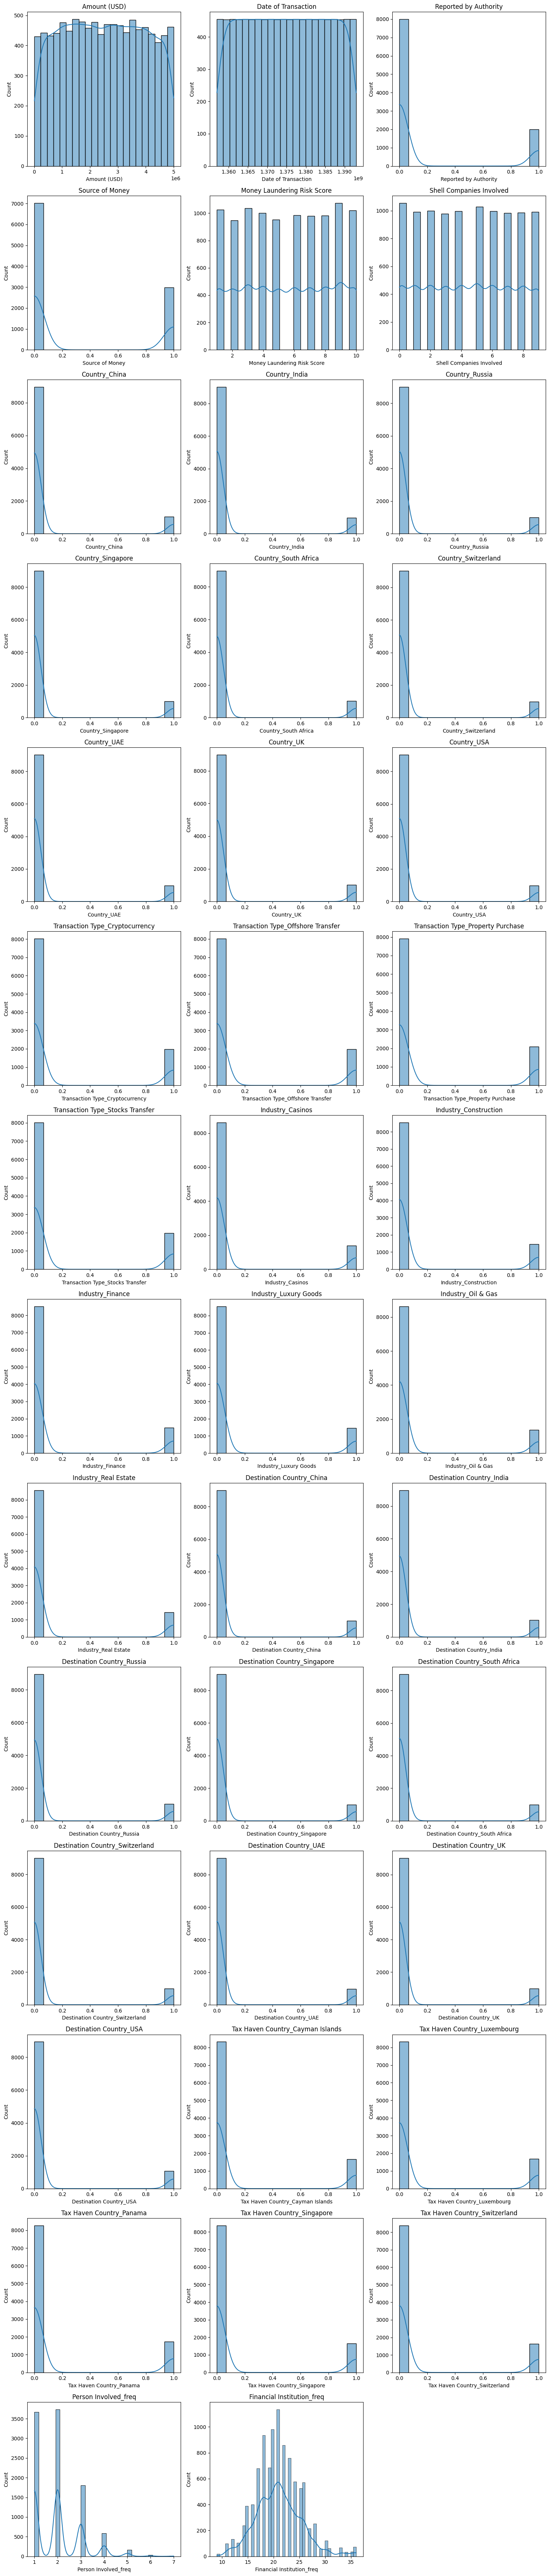

'\nafter checking, Im not sure which one to use so I just use standization for SVM and KNN and LR\n'

In [11]:
'''
check weather to use standization, normalization or neither
standization: becasue we have to use KNN and SVM, which are sensitive to the scale of the data
normalization: when the data is not normally distributed,
We will have 2 kind of feature selection, on eis for tree-based, since it wouldn't have any issue with the scale of the data(using df-Encode),
and the other one is for the model that are sensitive to the scale of the data(LR, KNN, SVM)
For the other one We will do standization, normalization before the feature selection part(Using df_E_S_N). Becasue we have will use warpper and Emvedded method,
which might use the model that are sensitive to the scale of the data(LR, KNN, SVM)
'''

import seaborn as sns
import matplotlib.pyplot as plt
num_columns = len(df_Encode.columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

axes = axes.flatten()

for i, col in enumerate(df_Encode.columns):
    sns.histplot(df_Encode[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

'''
after checking, Im not sure which one to use so I just use standization for SVM and KNN and LR
'''

### 4.2) Building different Scaling method df

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
import numpy as np

#Normalization
df_E_N = df_Encode.copy()
scaler_N = MinMaxScaler()
df_E_N[numcols] = scaler_N.fit_transform(df_E_N[numcols])

#Standization
df_E_S = df_Encode.copy()
scaler_sd = StandardScaler()
df_E_S[numcols] = scaler_sd.fit_transform(df_E_S[numcols])

#Standization and Normalization
df_E_SN = df_Encode.copy()
df_E_SN['Financial Institution_freq'] = scaler_sd.fit_transform(df_E_SN[['Financial Institution_freq']])#Financial Institution_freq follow the normal distribution
numcols.remove('Financial Institution_freq')
df_E_SN[numcols] = scaler_N.fit_transform(df_E_SN[numcols])
numcols.append('Financial Institution_freq')

#Uniform distribution
df_U  = df_Encode.copy()
quantile_transformer = QuantileTransformer(output_distribution='uniform')
df_U[numcols] = quantile_transformer.fit_transform(df_U[numcols])

#Standization, normalizaton & Uniform distribution
df_SNU = df_Encode.copy()
df_SNU['Financial Institution_freq'] = scaler_sd.fit_transform(df_SNU[['Financial Institution_freq']])
numcols.remove('Financial Institution_freq')
df_SNU['Person Involved_freq'] = np.log(df_SNU['Person Involved_freq'])
numcols.remove('Person Involved_freq')
df_SNU[numcols] = quantile_transformer.fit_transform(df_SNU[numcols])
numcols.append('Person Involved_freq')
numcols.append('Financial Institution_freq')

#Standization, normalizaton & Uniform distribution version 2
df_SNU_v2 = df_Encode.copy()
df_SNU_v2['Financial Institution_freq'] = scaler_sd.fit_transform(df_SNU_v2[['Financial Institution_freq']])
numcols.remove('Financial Institution_freq')
df_SNU_v2['Person Involved_freq'] = np.log(df_SNU_v2['Person Involved_freq'])
numcols.remove('Person Involved_freq')
df_SNU_v2[numcols] = scaler_N.fit_transform(df_SNU_v2[numcols])
numcols.append('Person Involved_freq')
numcols.append('Financial Institution_freq')

#Most OHE
df_OHE = df_Encode.copy()
#one-hot encoding for the new columns '_freq'
for col in freq_target_cols:
    df_OHE = pd.get_dummies(df_OHE, columns=[col + '_freq'], drop_first=True)
    print(f'{col}_freq has been one-hot encoded')
# one-hot encoding the scores
df_OHE = pd.get_dummies(df_OHE, columns=['Shell Companies Involved'], drop_first=True)
df_OHE = pd.get_dummies(df_OHE, columns=['Money Laundering Risk Score'], drop_first=True)
df_OHE[['Amount (USD)']] = quantile_transformer.fit_transform(df_OHE[['Amount (USD)']])

Person Involved_freq has been one-hot encoded
Financial Institution_freq has been one-hot encoded


### 4.3)Testing the result in 5 models

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

def process_data(df_list, model, type):
    acc_list = []
    f1_list = []
    roc_list = []
    fpr_tpr_list = []
    pre_list = []
    cr_list = []
    cm_list = []
    recall_list = []
    feature_importance_list = []
    model_params_list = []

    for df in df_list:
        X = df.drop('Source of Money', axis=1)
        y = df_Encode['Source of Money']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        rus = RandomUnderSampler(random_state=42)
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        if(hasattr(model, "predict_proba")):
          y_probs = model.predict_proba(X_test)[:, 0]
          fpr, tpr, thresholds = roc_curve(y_test, y_probs)
          fpr_tpr_list.append((fpr, tpr))
          roc_auc = roc_auc_score(y_test, y_probs)
        else:
          roc_auc = roc_auc_score(y_test, y_pred)

        acc_list.append(accuracy)
        f1_list.append(f1)
        roc_list.append(roc_auc)
        pre_list.append(precision)
        cr_list.append(cr)
        cm_list.append(cm)
        recall_list.append(recall)
        #save the model parameters
        if type == 'non linear':
            model_params = model.get_params()
            result = permutation_importance(model, X_resampled, y_resampled, n_repeats=10, random_state=42, n_jobs=-1)
            feature_importance = result.importances_mean
            model_params_list.append(feature_importance)
            feature_importance_list.append(model_params)
        elif type == 'tree':
            model_params = model.get_params()
            feature_importance = model.feature_importances_
            model_params_list.append(feature_importance)
            feature_importance_list.append(model_params)
        elif type == 'linear':
            model_params = model.get_params()
            feature_importance = model.coef_
            model_params_list.append(feature_importance)
            feature_importance_list.append(model_params)

    return acc_list, f1_list, roc_list, pre_list, cr_list, cm_list, recall_list, feature_importance_list, model_params_list, fpr_tpr_list

df_list = [ df_Encode,
           df_E_N,
           df_E_S,
           df_E_SN,
           df_U,
           df_SNU,
           df_SNU_v2,
           df_OHE]

#### 4.3.1) LR


In [14]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_acc_list, lr_f1_list, lr_roc_list, lr_pre_list, lr_cr_list, lr_cm_list, lr_recall_list, lr_model_params_list, lr_feature_importance_list, lr_fpr_tpr_list = process_data(df_list, LogisticRegression(max_iter=1000), 'linear')


C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

#### 4.3.2) RF

In [15]:
#ranoem forest
from sklearn.ensemble import RandomForestClassifier

rf_acc_list, rf_f1_list, rf_roc_list, rf_pre_list, rf_cr_list, rf_cm_list, rf_recall_list, rf_model_params_list, rf_feature_importance_list, rf_fpr_tpr_list = process_data(df_list, RandomForestClassifier(), 'tree')

#### 4.3.3) DT

In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_acc_list, dt_f1_list, dt_roc_list, dt_pre_list, dt_cr_list, dt_cm_list, dt_recall_list, dt_model_params_list, dt_feature_importance_list, dt_fpr_tpr_list = process_data(df_list, DecisionTreeClassifier(), 'tree')

#### 4.3.4) SVC

In [17]:
#SVC
from sklearn.svm import SVC
# it takes too long to run the model, so I comment it out, will customise the model in below
#svc_acc_list, svc_f1_list, svc_roc_list, svc_pre_list, svc_cr_list, svc_cm_list, svc_recall_list, svc_model_params, svc_feature_importance = process_data(df_list, SVC(), 'non linear')
def process_data_svm(df_list, model):
    acc_list = []
    f1_list = []
    roc_list = []
    fpr_tpr_list = []
    pre_list = []
    cr_list = []
    cm_list = []
    recall_list = []
    model_params_list = []

    for df in df_list:
        X = df.drop('Source of Money', axis=1)
        y = df_Encode['Source of Money']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        rus = RandomUnderSampler(random_state=42)
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        y_probs = model.predict_proba(X_test)[:, 0]
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)
        roc_auc = roc_auc_score(y_test, y_probs)

        acc_list.append(accuracy)
        f1_list.append(f1)
        roc_list.append(roc_auc)
        fpr_tpr_list.append((fpr, tpr))
        pre_list.append(precision)
        cr_list.append(cr)
        cm_list.append(cm)
        recall_list.append(recall)
        #save the model parameters
        model_params = model.get_params()
        model_params_list.append(model_params)
        #will refit the model again to get the feature importance, when we decide which df to use

    return acc_list, f1_list, roc_list, pre_list, cr_list, cm_list, recall_list, model_params_list, fpr_tpr_list

svc_acc_list, svc_f1_list, svc_roc_list, svc_pre_list, svc_cr_list, svc_cm_list, svc_recall_list, svc_model_params_list, svc_fpr_tpr_list = process_data_svm(df_list, SVC(probability=True))

#### 4.3.5) SGD

In [18]:
#SGD
from sklearn.linear_model import SGDClassifier

sgd_acc_list, sgd_f1_list, sgd_roc_list, sgd_pre_list, sgd_cr_list, sgd_cm_list, sgd_recall_list, sgd_model_params_list, sgd_feature_importance_list, sgd_fpr_tpr_list = process_data(df_list, SGDClassifier(), 'linear')

C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

#### 4.4) Showcasing deep dive into results

In [19]:
# showcase how to print the result pre model, if want to dig in more, just copy the code above and change the model name
df_names = ['df_Encode',
           'df_E_N',
           'df_E_S',
           'df_E_SN',
           'df_U',
           'df_SNU',
           'df_SNU_v2',
           'df_OHE']
#getting result per model
for i in range(0, len(lr_cr_list)):#change the model name here e.g. lr_cr_list to rf_cr_list
    print(f'{df_names[i]}:')
    print("Classification Reports:")
    print(lr_cr_list[i])
    print('Confusion Matrix:')
    print(lr_cm_list[i])
    print(f'Accuracy: {lr_acc_list[i]}')
    print(f'F1: {lr_f1_list[i]}')
    print(f'Precision: {lr_pre_list[i]}')
    print(f'Recall: {lr_recall_list[i]}')
    print(f'ROC: {lr_roc_list[i]}')
    print('----------------------------------------------------\n')



df_Encode:
Classification Reports:
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      1389
           1       0.33      0.54      0.41       611

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.50      2000
weighted avg       0.60      0.52      0.54      2000

Confusion Matrix:
[[707 682]
 [282 329]]
Accuracy: 0.518
F1: 0.40567200986436497
Precision: 0.3254203758654797
Recall: 0.5384615384615384
ROC: 0.4865349560905831
----------------------------------------------------

df_E_N:
Classification Reports:
              precision    recall  f1-score   support

           0       0.69      0.46      0.56      1389
           1       0.31      0.54      0.39       611

    accuracy                           0.49      2000
   macro avg       0.50      0.50      0.47      2000
weighted avg       0.58      0.49      0.50      2000

Confusion Matrix:
[[644 745]
 [284 327]]
Accuracy: 0.4855
F1: 0

In the end we found that the df_Encode has the best performance in the baseline model, therefore we will use it for the next step

### 4.5) Visualization the result

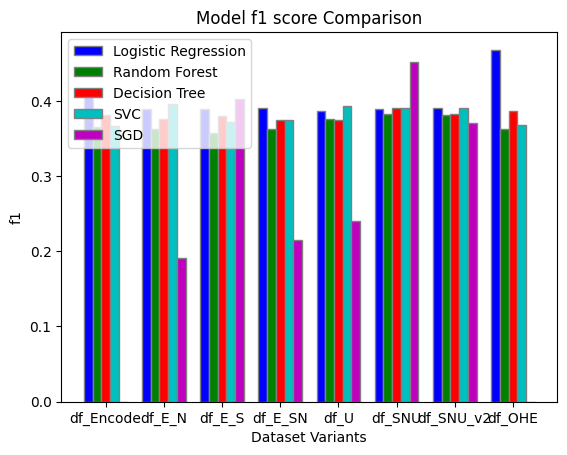

In [20]:
x = df_names
y = [lr_f1_list, rf_f1_list, dt_f1_list, svc_f1_list, sgd_f1_list]

colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC', 'SGD']

n_datasets = len(x)
n_models = len(y)

bar_width = 0.15
r = np.arange(n_datasets)

for i, y_list in enumerate(y):
    plt.bar(r + i * bar_width, y_list, color=colors[i], width=bar_width, edgecolor='grey', label=labels[i])

plt.xlabel('Dataset Variants')
plt.ylabel('f1')
plt.title('Model f1 score Comparison')
plt.xticks(r + bar_width * (n_models - 1) / 2, x)
plt.legend()
plt.show()


(8, 5)
[0.30355636 0.34242544 0.38004355 0.34338656 0.35410166 0.40037507
 0.38300196 0.316846  ]


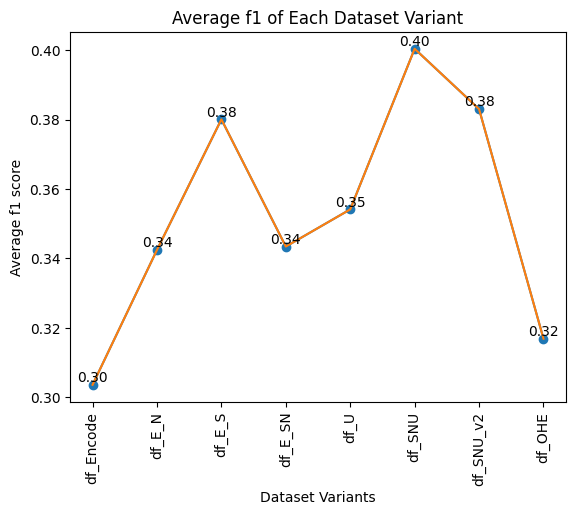

In [21]:
#find the average of the accuracy of each dataframe
y_arr = np.array(y, dtype=float)
y_arr = y_arr.T

print(y_arr.shape)

y_sum = np.sum(y_arr, axis=1) / y_arr.shape[1]

print(y_sum)

plt.plot(df_names, y_sum, marker='o')

for i, value in enumerate(y_sum):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.plot(df_names, y_sum)
plt.xlabel('Dataset Variants')
plt.ylabel('Average f1 score')
plt.title('Average f1 of Each Dataset Variant')
plt.xticks(rotation=90)
plt.show()



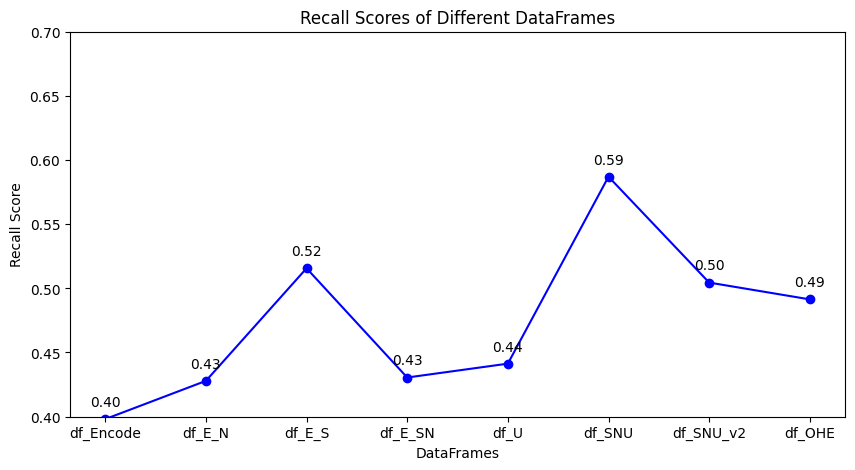

recall of df_E_N = 0.42782324058919796 
 recall of df_E_SN = 0.4304418985270049
 recall of df_U = 0.4412438625204582
 recall of df_SNU = 0.5869067103109656
 recall of df_SNU_v2 = 0.5044189852700491


In [22]:
#we will further look at recall score
recall_arr = np.array([lr_recall_list,rf_recall_list, dt_recall_list, svc_recall_list, sgd_recall_list], dtype=float)
recall_arr = recall_arr.T

recall_sum = np.sum(recall_arr, axis=1) / recall_arr.shape[1]

#plot the recall of those 5 models
plt.figure(figsize=(10, 5))
plt.plot(df_names, recall_sum, marker='o', linestyle='-', color='b')

plt.xlabel('DataFrames')
plt.ylabel('Recall Score')
plt.title('Recall Scores of Different DataFrames')
plt.ylim(0.4, 0.7)

# Annotate each point with its recall score
for i, recall in enumerate(recall_sum):
    plt.text(df_names[i], recall + 0.01, f'{recall:.2f}', ha='center')

plt.show()

print(f'recall of df_E_N = {recall_sum[1]} \n recall of df_E_SN = {recall_sum[3]}\n recall of df_U = {recall_sum[4]}\n recall of df_SNU = {recall_sum[5]}\n recall of df_SNU_v2 = {recall_sum[6]}')



#### based on the result we choose, df_Encode

In [23]:
#since we decide to use df_U, we will refit the SVM model to get the feature importance
X = df_Encode.drop('Source of Money', axis=1)
y = df_Encode['Source of Money']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
model = SVC()
model.fit(X_resampled, y_resampled)
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
svm_feature_importance = result.importances_mean


## 5.) PCA

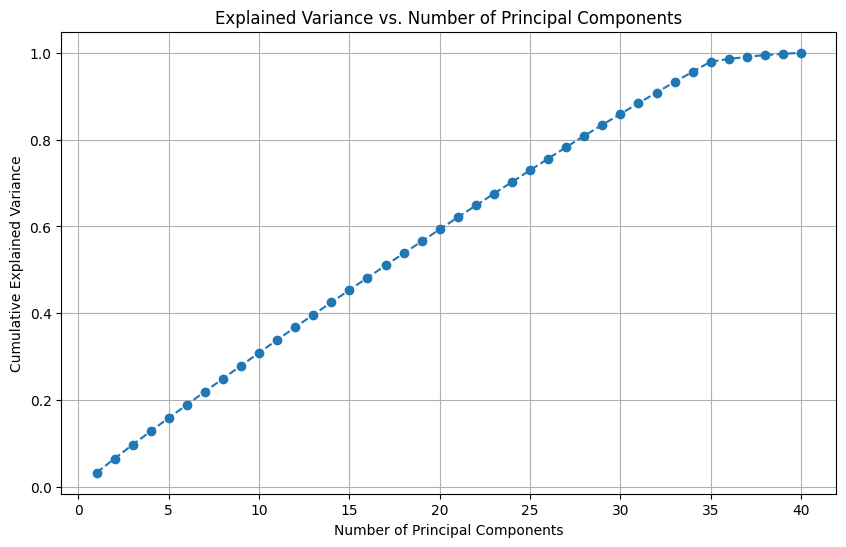

In [24]:
#PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df_Encode.drop('Source of Money', axis=1)

#standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA()

X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

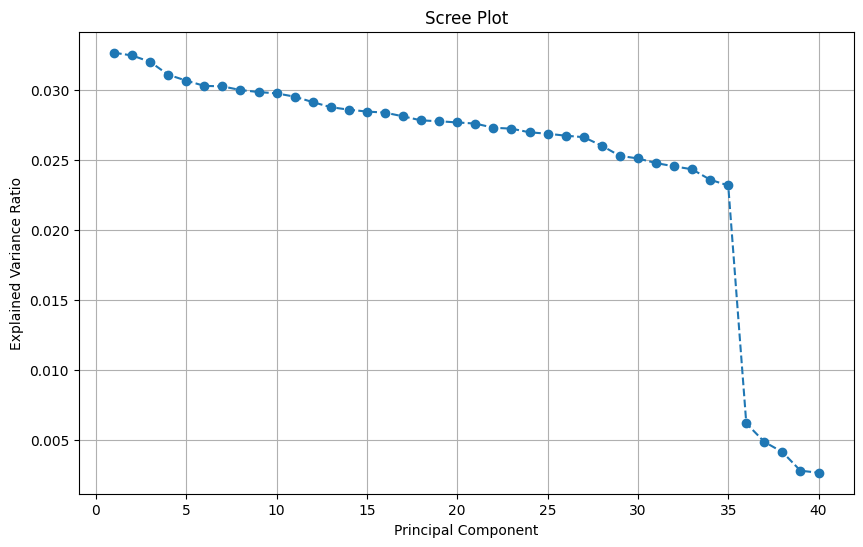

In [25]:
#PCA scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

#### 15 would be consider as the number of feature

## 7.) Spliting dataset & pipeline

In [26]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

X = df_Encode.drop('Source of Money', axis=1)
y = df_Encode['Source of Money']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Set up StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Define the pipeline for each model
rus = RandomUnderSampler(random_state=42)
pipeline_lr = Pipeline([
    ('undersample', rus),
    ('classifier', LogisticRegression(random_state=42))
])
pipeline_rf = Pipeline([
    ('undersample', rus),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline_dt = Pipeline([
    ('undersample', rus),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline_svc = Pipeline([
    ('undersample', rus),
    ('classifier', SVC(random_state=42))
])
pipeline_sgd = Pipeline([
    ('undersample', rus),
    ('classifier', SGDClassifier(random_state=42))
])

#pipeline.steps.insert(1, ('scaler', StandardScaler()))


## 8.) Classification model

### 8.1) Baseline model

In [27]:
color_heatmap = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges', 'Greys']
color_bar = ['blue', 'green', 'red', 'purple', 'orange', 'grey']

def ploting_result_baseline(acc_list, f1_list, roc_list, pre_list, cr_list, cm_list, recall_list, model_params, feature_importance, color_heatmap, color_bar, model_name, fpr_tpr):
    print(f'{model_name} Baseline:')
    print("model parameters:")
    print(model_params)
    print("Classification Reports:")
    print(cr_list)
    print('Confusion Matrix:')
    print(cm_list)
    print(f'Accuracy: {acc_list}')
    print(f'F1: {f1_list}')
    print(f'Precision: {pre_list}')
    print(f'Recall: {recall_list}')
    print(f'ROC: {roc_list}')
    print('----------------------------------------------------\n')

    #plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm_list, annot=True, cmap=color_heatmap)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Baseline Confusion Matrix')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(['f1', 'accuracy', 'recall', 'precision', 'roc_auc'], [f1_list, acc_list, recall_list, pre_list, roc_list], color=color_bar)
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title(f'{model_name} Scores')
    plt.show()

    #plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, feature_importance, color=color_bar)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'{model_name} Baseline Feature Importance')
    plt.show()

    plt.figure()
    plt.plot(fpr_tpr[0], fpr_tpr[1], color='blue', label=f'ROC Curve (AUC = {roc_list:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line for random performance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()



#### 8.1.1) LR

Logistic Regression Baseline:
model parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Classification Reports:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56      1389
           1       0.30      0.53      0.39       611

    accuracy                           0.49      2000
   macro avg       0.50      0.50      0.47      2000
weighted avg       0.57      0.49      0.51      2000

Confusion Matrix:
[[654 735]
 [289 322]]
Accuracy: 0.488
F1: 0.38609112709832133
Precision: 0.304635761589404
Recall: 0.5270049099836334
ROC: 0.5033917417539494
----------------------------------------------------



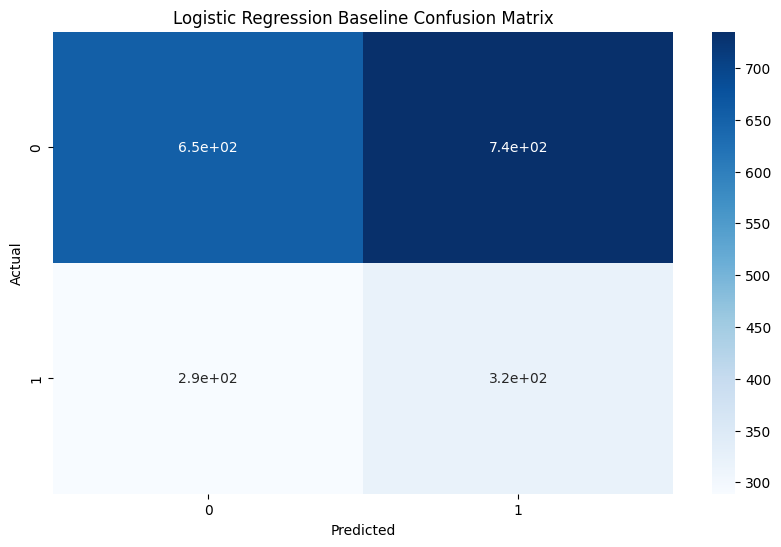

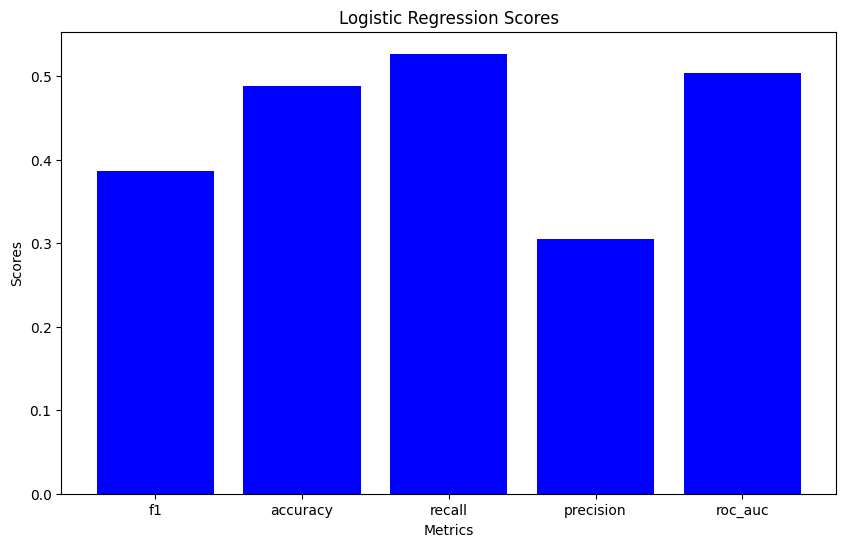

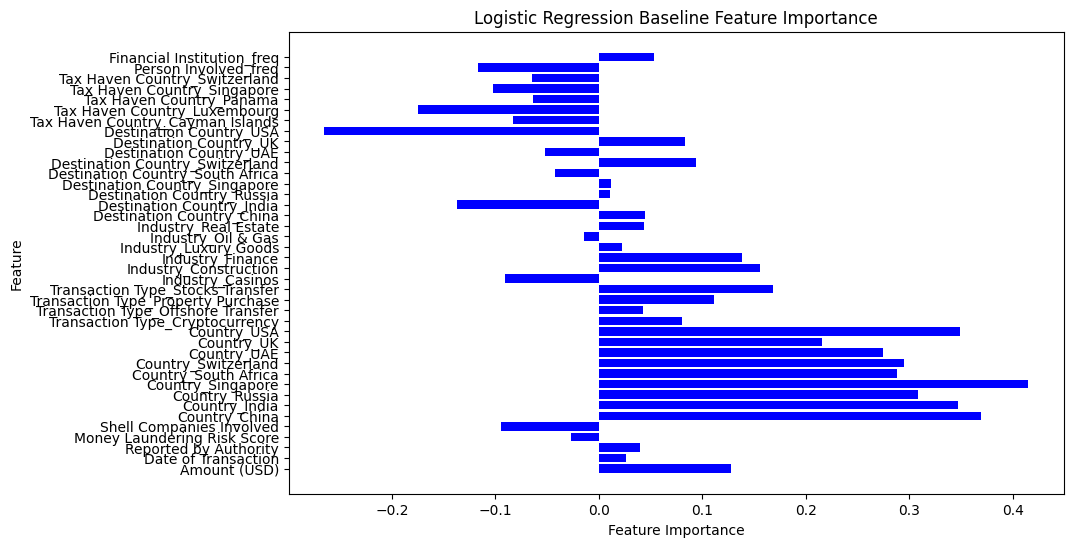

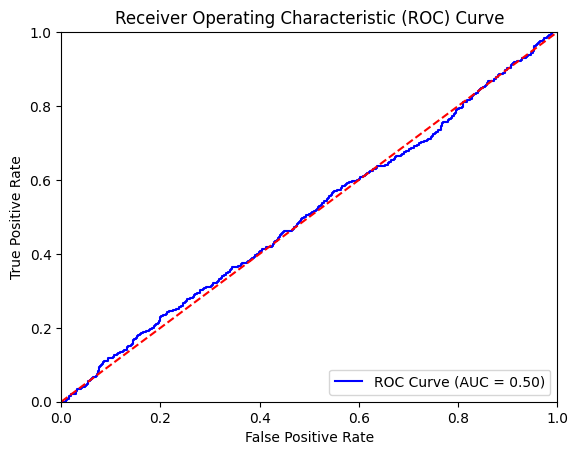

In [28]:
ploting_result_baseline(lr_acc_list[4], lr_f1_list[4], lr_roc_list[4], lr_pre_list[4], lr_cr_list[4], lr_cm_list[4], lr_recall_list[4], lr_model_params_list[4], lr_feature_importance_list[4][0], color_heatmap[0], color_bar[0], 'Logistic Regression', lr_fpr_tpr_list[4])

#### 8.1.2) RF

Random Forest Baseline:
model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Classification Reports:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61      1389
           1       0.31      0.47      0.38       611

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.58      0.52      0.54      2000

Confusion Matrix:
[[749 640]
 [321 290]]
Accuracy: 0.5195
F1: 0.37637897469175857
Precision: 0.3118279569892473
Recall: 0.4746317512274959
ROC: 0.4991804910926275
----------------------------

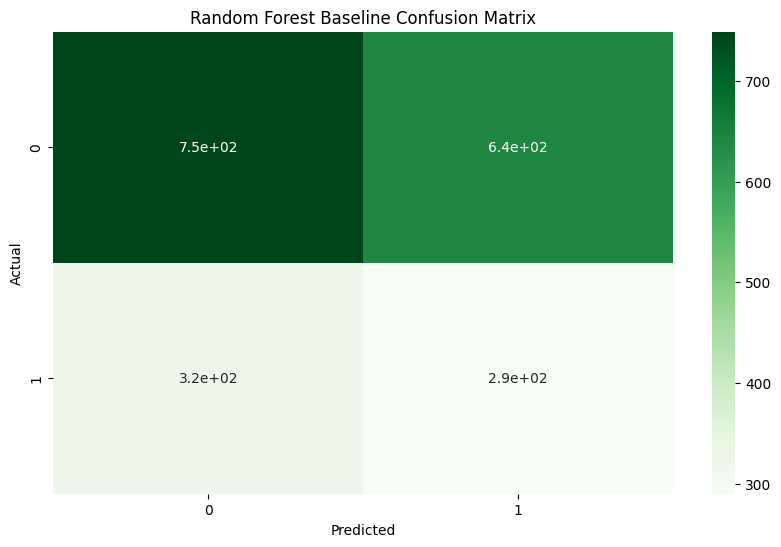

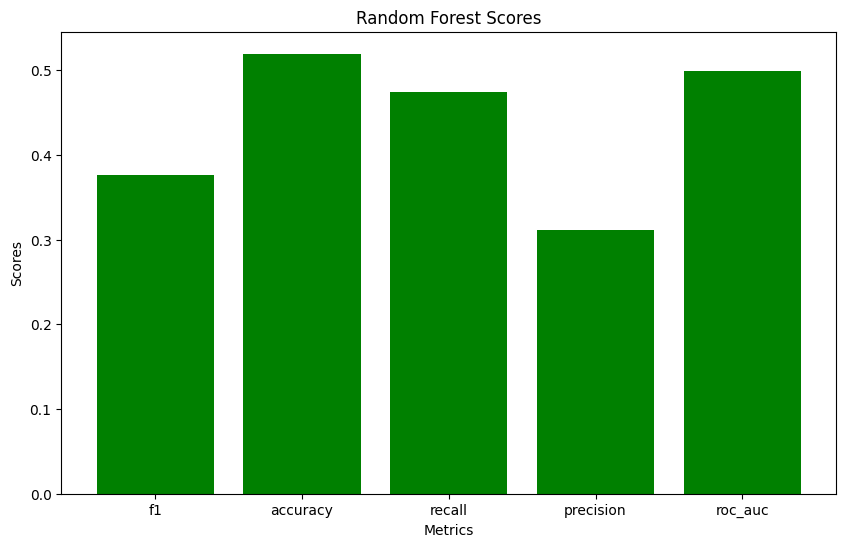

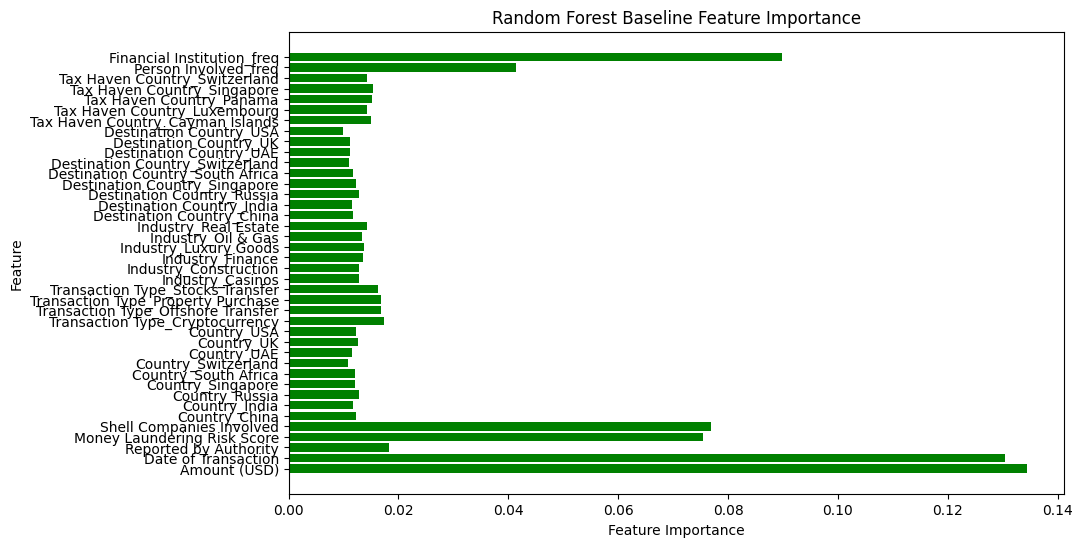

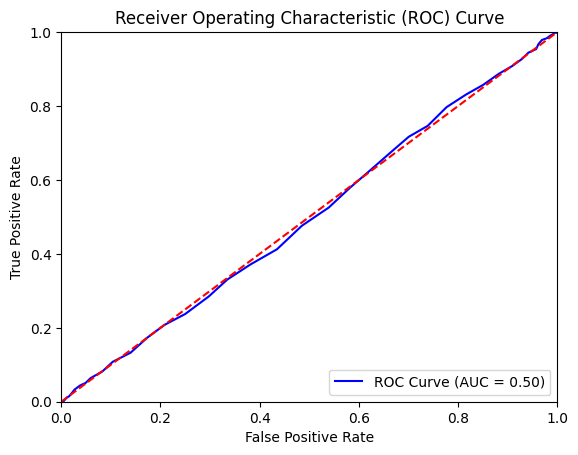

In [29]:
ploting_result_baseline(rf_acc_list[4], rf_f1_list[4], rf_roc_list[4], rf_pre_list[4], rf_cr_list[4], rf_cm_list[4], rf_recall_list[4], rf_model_params_list[4], rf_feature_importance_list[4], color_heatmap[1], color_bar[1], 'Random Forest', rf_fpr_tpr_list[4])

#### 8.1.3) DT

Decision Tree Baseline:
model parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Classification Reports:
              precision    recall  f1-score   support

           0       0.69      0.49      0.57      1389
           1       0.30      0.50      0.37       611

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.47      2000
weighted avg       0.57      0.49      0.51      2000

Confusion Matrix:
[[683 706]
 [308 303]]
Accuracy: 0.493
F1: 0.37407407407407406
Precision: 0.3002973240832507
Recall: 0.4959083469721768
ROC: 0.5061854953404055
----------------------------------------------------



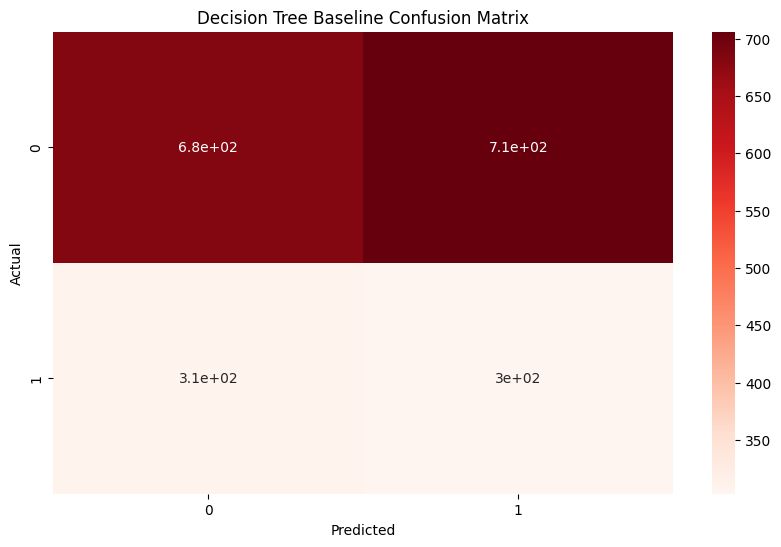

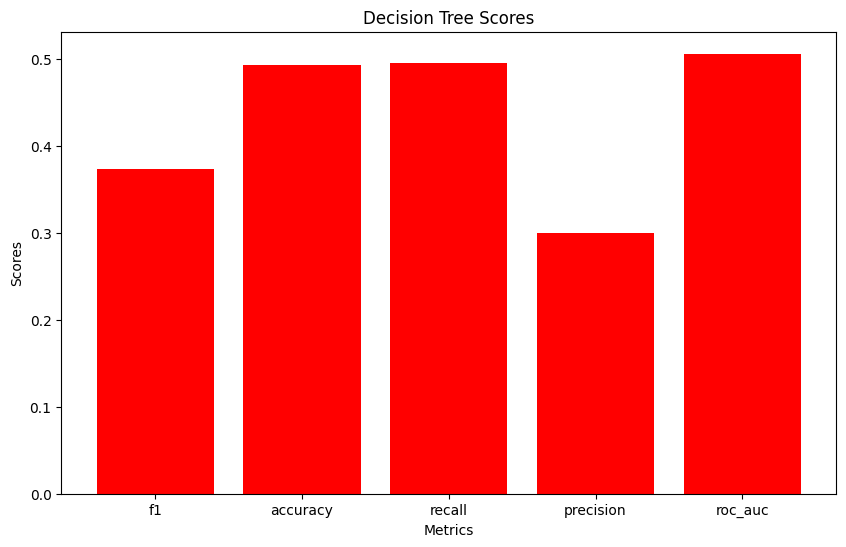

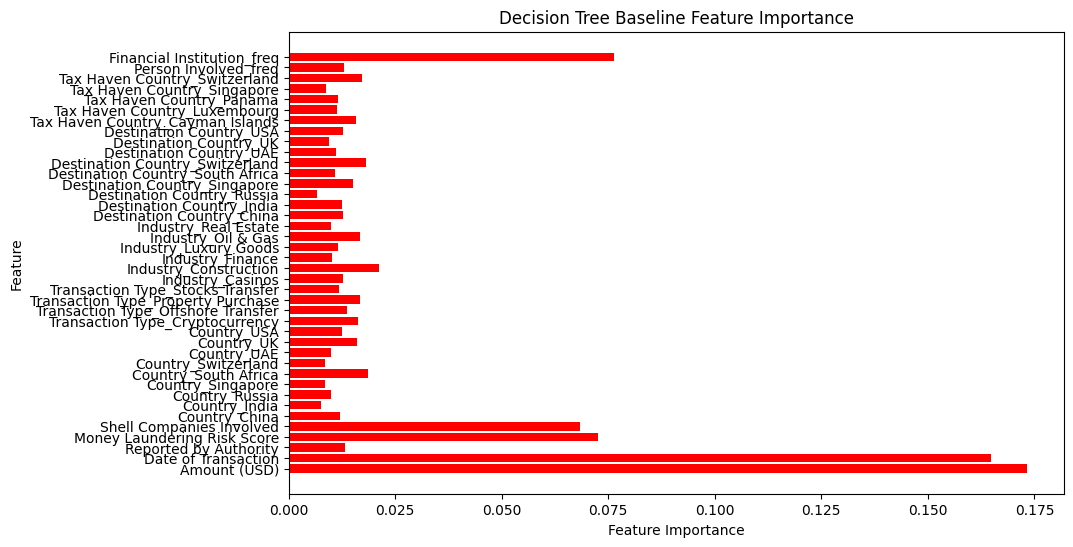

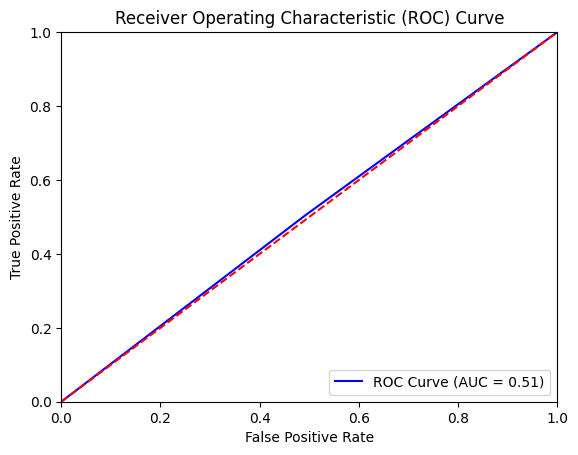

In [30]:
ploting_result_baseline(dt_acc_list[4], dt_f1_list[4], dt_roc_list[4], dt_pre_list[4], dt_cr_list[4], dt_cm_list[4], dt_recall_list[4], dt_model_params_list[4], dt_feature_importance_list[4], color_heatmap[2], color_bar[2], 'Decision Tree', dt_fpr_tpr_list[4])

#### 8.1.4) SVC

SVC Baseline:
model parameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Classification Reports:
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      1389
           1       0.32      0.52      0.39       611

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.59      0.51      0.53      2000

Confusion Matrix:
[[705 684]
 [294 317]]
Accuracy: 0.511
F1: 0.3933002481389578
Precision: 0.3166833166833167
Recall: 0.5188216039279869
ROC: 0.49183319016966365
----------------------------------------------------



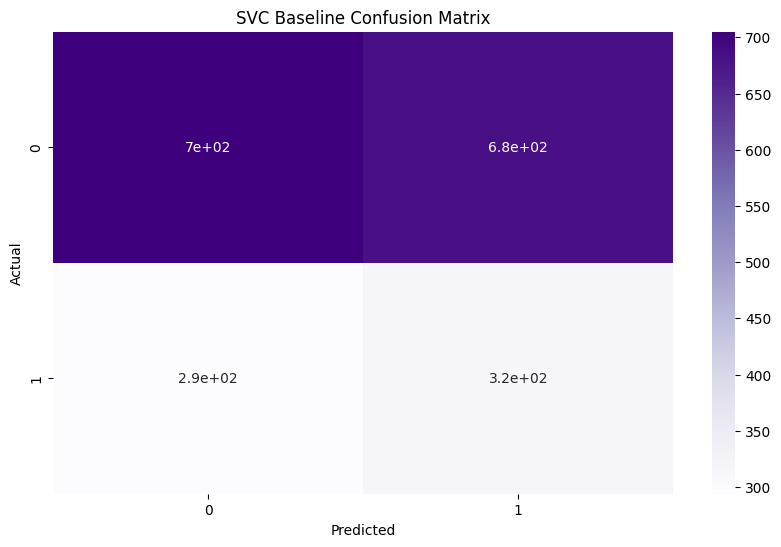

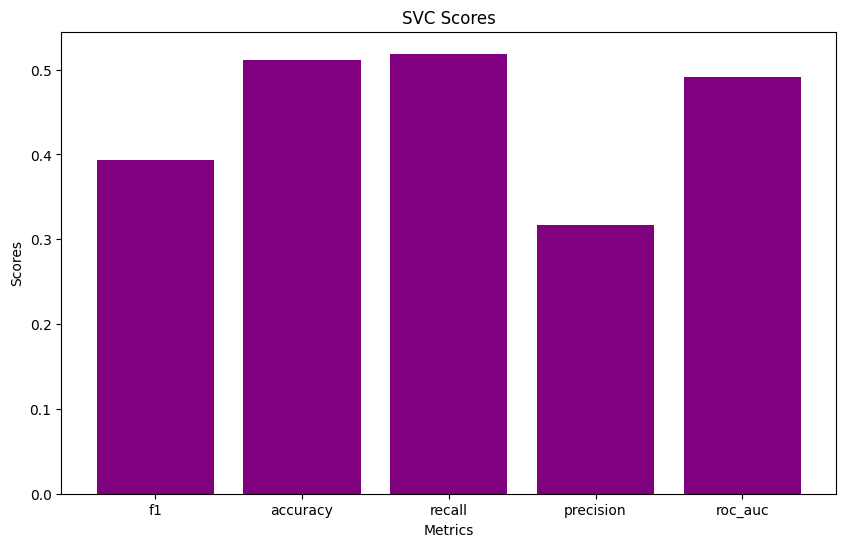

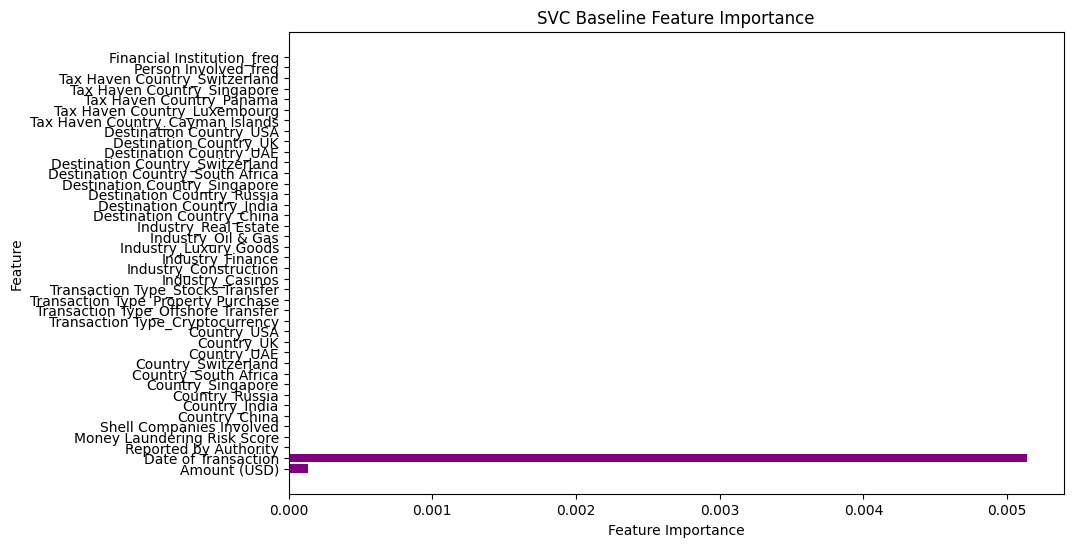

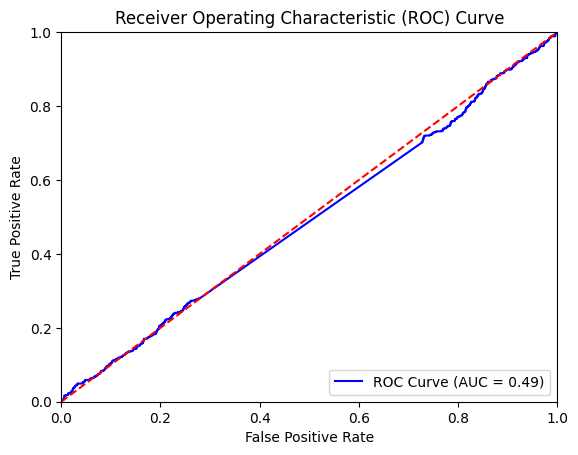

In [31]:
ploting_result_baseline(svc_acc_list[4], svc_f1_list[4], svc_roc_list[4], svc_pre_list[4], svc_cr_list[4], svc_cm_list[4], svc_recall_list[4], svc_model_params_list[4], svm_feature_importance, color_heatmap[3], color_bar[3], 'SVC', svc_fpr_tpr_list[4])

#### 8.1.5) SGD

SGD Baseline:
model parameters:
{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Classification Reports:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1389
           1       0.33      0.19      0.24       611

    accuracy                           0.63      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.59      0.63      0.60      2000

Confusion Matrix:
[[1152  237]
 [ 495  116]]
Accuracy: 0.634
F1: 0.24066390041493776
Precision: 0.3286118980169972
Recall: 0.18985270049099837
ROC: 0.5096131752994949
----------------------------------------------

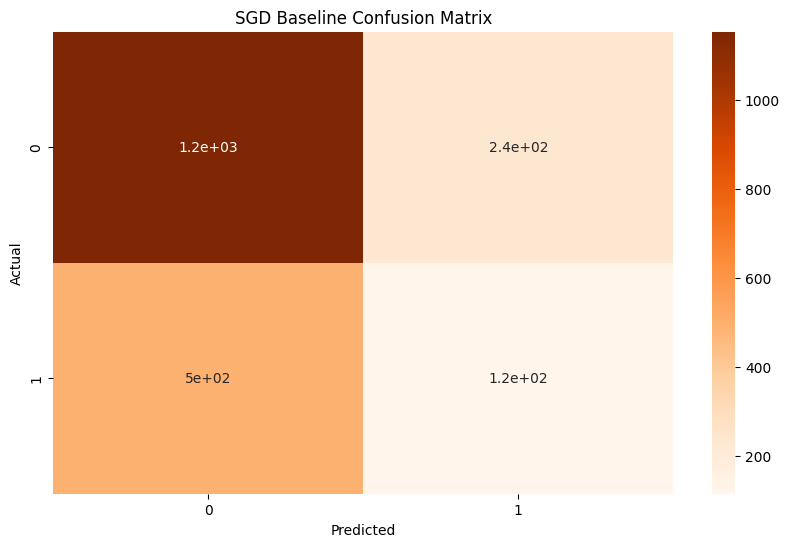

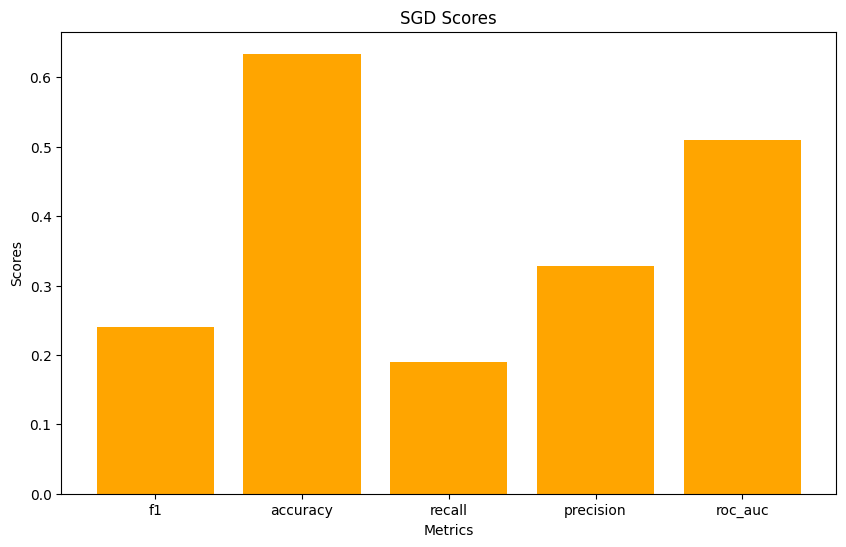

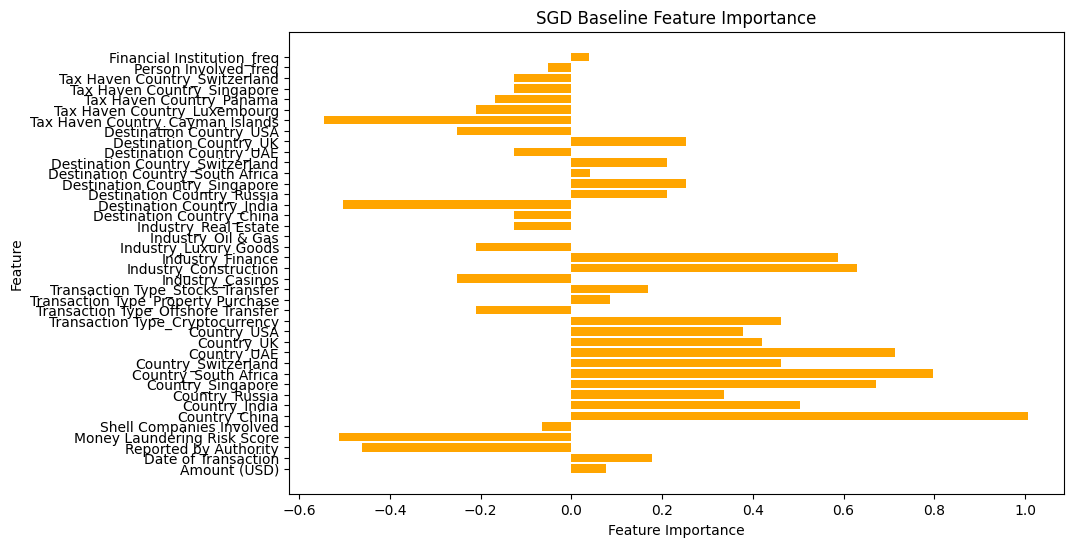

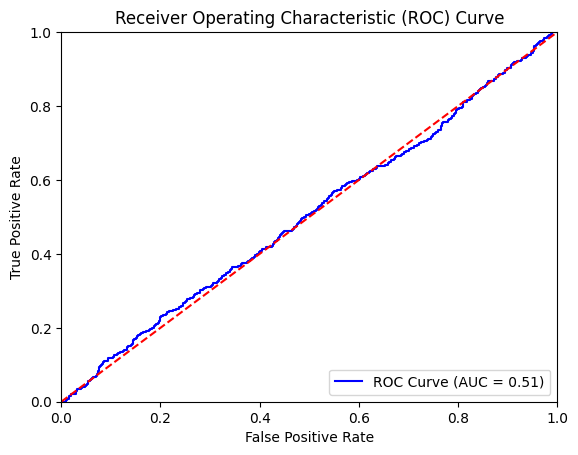

In [32]:
ploting_result_baseline(sgd_acc_list[4], sgd_f1_list[4], sgd_roc_list[4], sgd_pre_list[4], sgd_cr_list[4], sgd_cm_list[4], sgd_recall_list[4], sgd_model_params_list[4], sgd_feature_importance_list[4][0], color_heatmap[4], color_bar[4], 'SGD', lr_fpr_tpr_list[4])

### 8.2) First CVGridSearch

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance

def grid_searching(pipeline, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return grid_search, f1, accuracy, recall, precision, roc_auc, cm, cr, best_params

def result_showing(model_name, grid_search, f1, accuracy, recall, precision, roc_auc, cm, cr, best_params, color_heatmap, color_bar):
    print(f'{model_name} grid search best parameters: {best_params}')
    print(f'{model_name} model preformance:')
    print(f'confusion_matrix:\n{cm}')
    print(f'classification report:{cr}')
    print(f'accuracy:{accuracy}')
    print(f'f1:{f1}')
    print(f'recall:{recall}')
    print(f'precision:{precision}')
    print(f'roc_auc:{roc_auc}')
    print('----------------------------------------------------')
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color_heatmap)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.bar(['f1', 'accuracy', 'recall', 'precision', 'roc_auc'], [f1, accuracy, recall, precision, roc_auc], color=color_bar)
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title(f'{model_name} Scores')
    plt.show()

def tree_graph(grid_search):
    plt.figure(figsize=(20, 10))
    plot_tree(grid_search.best_estimator_['classifier'], feature_names=X.columns, filled=True, fontsize=8)
    plt.show()


def permutation_feature_importance(name, grid_search, X, y): #for non l
    model = grid_search.best_estimator_
    print("Model:", model)
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
    print("Permutation importances:", result.importances_mean)
    features = X.columns
    features_df = pd.DataFrame(result.importances_mean, index=features, columns=['Importance'])
    features_df = features_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'{name} Permutation Feature Importance')
    plt.show()

def features_importance_linear(name, grid_search, df):
    features_importance = grid_search.best_estimator_['classifier'].coef_[0]
    features = df.columns
    features_df = pd.DataFrame(features_importance, index=features, columns=['Importance'])
    features_df = features_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'{name} Features Importance')
    plt.show()

def features_importance_tree(name, grid_search, df):
    features_importance = grid_search.best_estimator_['classifier'].feature_importances_
    features = df.columns
    features_df = pd.DataFrame(features_importance, index=features, columns=['Importance'])
    features_df = features_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'{name} Features Importance')
    plt.show()

#### 8.2.1) LR

In [34]:
lr_param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]
}
lr_grid_search, lr_before_f1, lr_before_accuracy, lr_before_recall, lr_before_precision, lr_before_roc_auc, lr_before_cm, lr_before_cr, lr_before_best_params = grid_searching(pipeline_lr, lr_param_grid, X_train, y_train, X_test, y_test)

C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Before feature selection Logistic Regression grid search best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Before feature selection Logistic Regression model preformance:
confusion_matrix:
[[705 684]
 [281 330]]
classification report:              precision    recall  f1-score   support

           0       0.72      0.51      0.59      1389
           1       0.33      0.54      0.41       611

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.50      2000
weighted avg       0.60      0.52      0.54      2000

accuracy:0.5175
f1:0.40615384615384614
recall:0.5400981996726678
precision:0.3254437869822485
roc_auc:0.5238287974605239
----------------------------------------------------


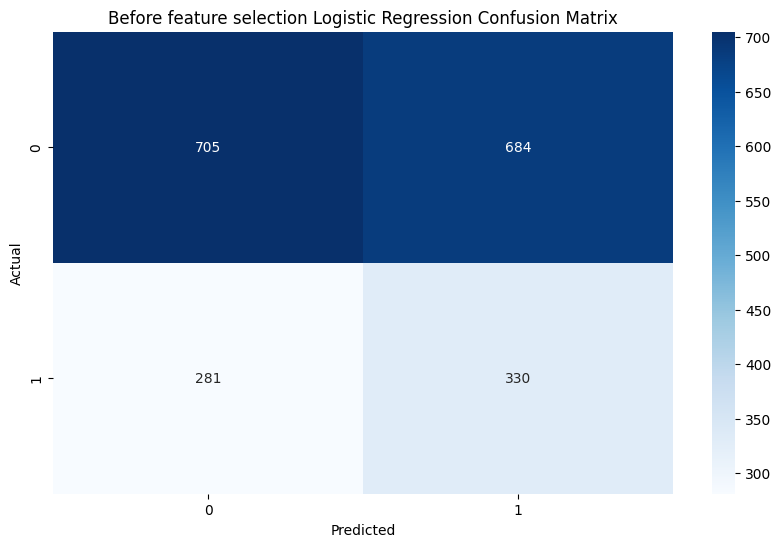

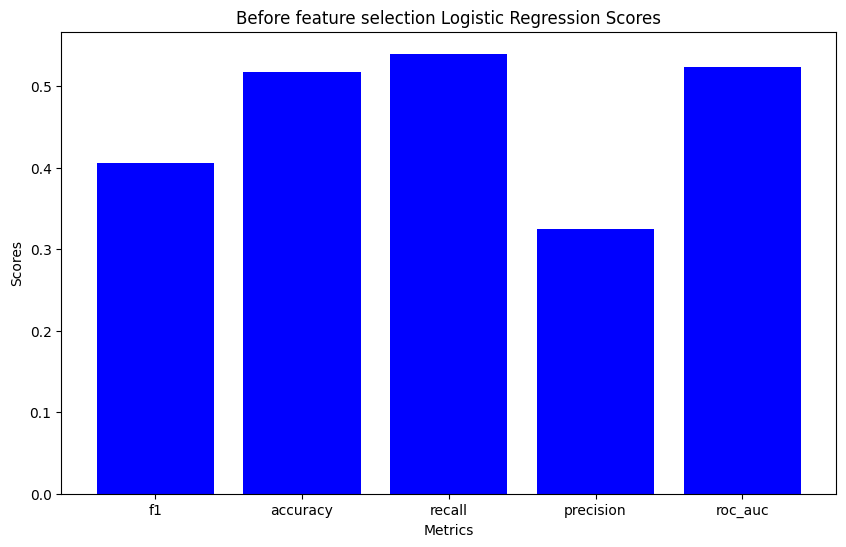

In [35]:
result_showing('Before feature selection Logistic Regression', lr_grid_search, lr_before_f1, lr_before_accuracy, lr_before_recall, lr_before_precision, lr_before_roc_auc, lr_before_cm, lr_before_cr, lr_before_best_params, color_heatmap[0], color_bar[0])

Model: Pipeline(steps=[('undersample', RandomUnderSampler(random_state=42)),
                ('classifier',
                 LogisticRegression(C=0.01, penalty='l1', random_state=42,
                                    solver='saga'))])
X shape: (2000, 40)
y shape: (2000,)
Permutation importances: [0.02235 0.00065 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.     ]


C:\Users\ericr\AppData\Local\Temp\ipykernel_31768\3720094806.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')


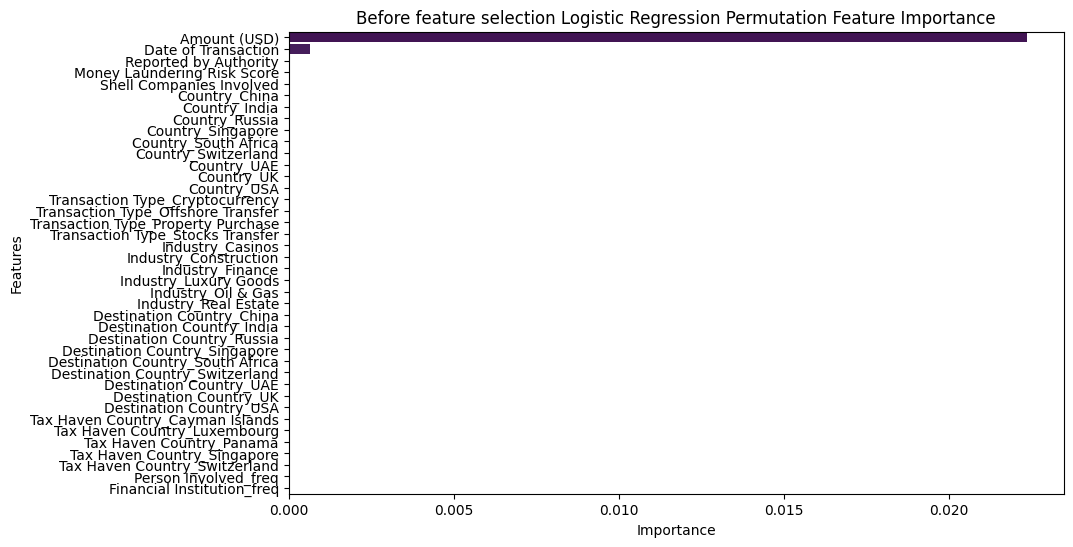

In [36]:
permutation_feature_importance('Before feature selection Logistic Regression', lr_grid_search, X_test, y_test)

#### 8.2.2) DT

In [37]:
dt_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}
dt_grid_search, dt_before_f1, dt_before_accuracy, dt_before_recall, dt_before_precision, dt_before_roc_auc, dt_before_cm, dt_before_cr, dt_before_best_params = grid_searching(pipeline_dt, dt_param_grid, X_train, y_train, X_test, y_test)

C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
990 fits failed out of a total of 2970.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
485 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

Before feature selection Decision Tree grid search best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Before feature selection Decision Tree model preformance:
confusion_matrix:
[[548 841]
 [209 402]]
classification report:              precision    recall  f1-score   support

           0       0.72      0.39      0.51      1389
           1       0.32      0.66      0.43       611

    accuracy                           0.47      2000
   macro avg       0.52      0.53      0.47      2000
weighted avg       0.60      0.47      0.49      2000

accuracy:0.475
f1:0.4336569579288026
recall:0.6579378068739771
precision:0.3234111021721641
roc_auc:0.5262331222994796
----------------------------------------------------


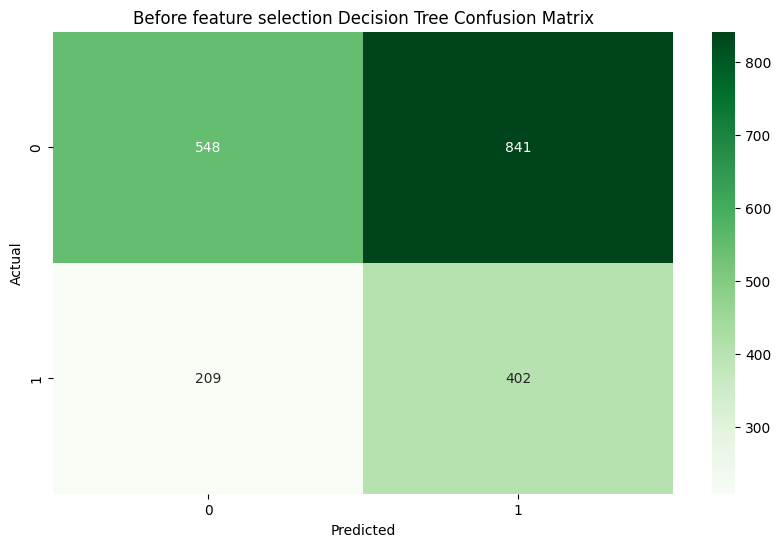

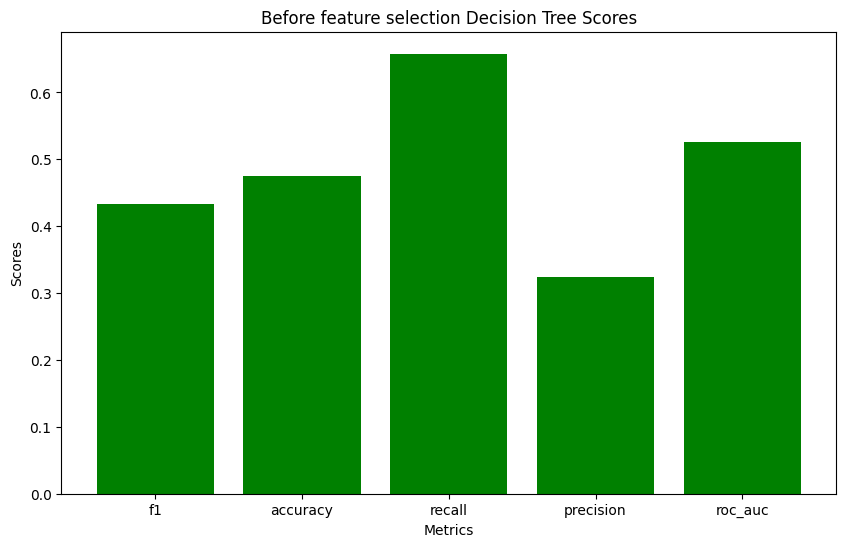

In [38]:
result_showing('Before feature selection Decision Tree', dt_grid_search, dt_before_f1, dt_before_accuracy, dt_before_recall, dt_before_precision, dt_before_roc_auc, dt_before_cm, dt_before_cr, dt_before_best_params, color_heatmap[1], color_bar[1])

C:\Users\ericr\AppData\Local\Temp\ipykernel_31768\3720094806.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')


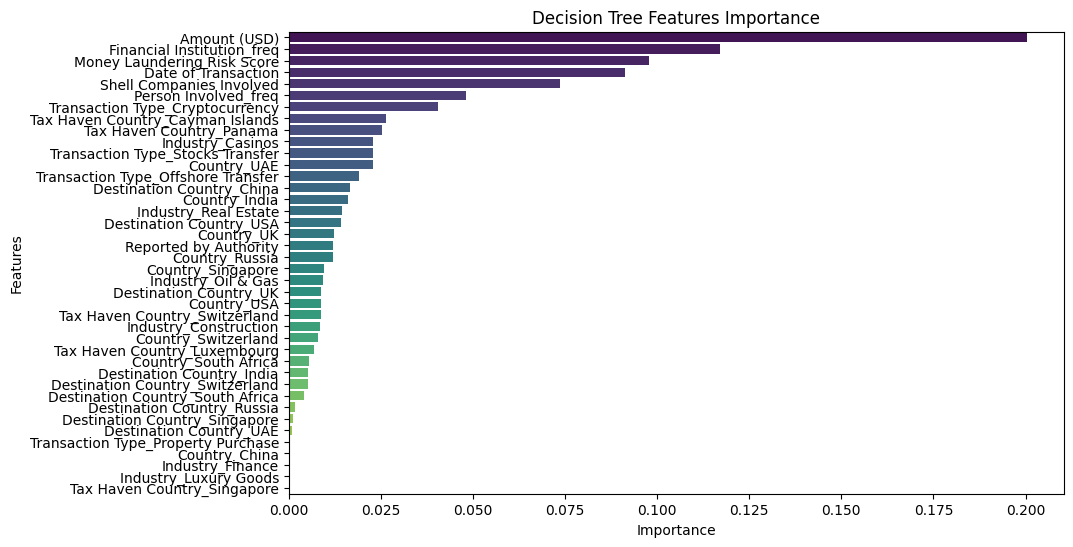

In [39]:
features_importance_tree('Decision Tree', dt_grid_search, X_train)

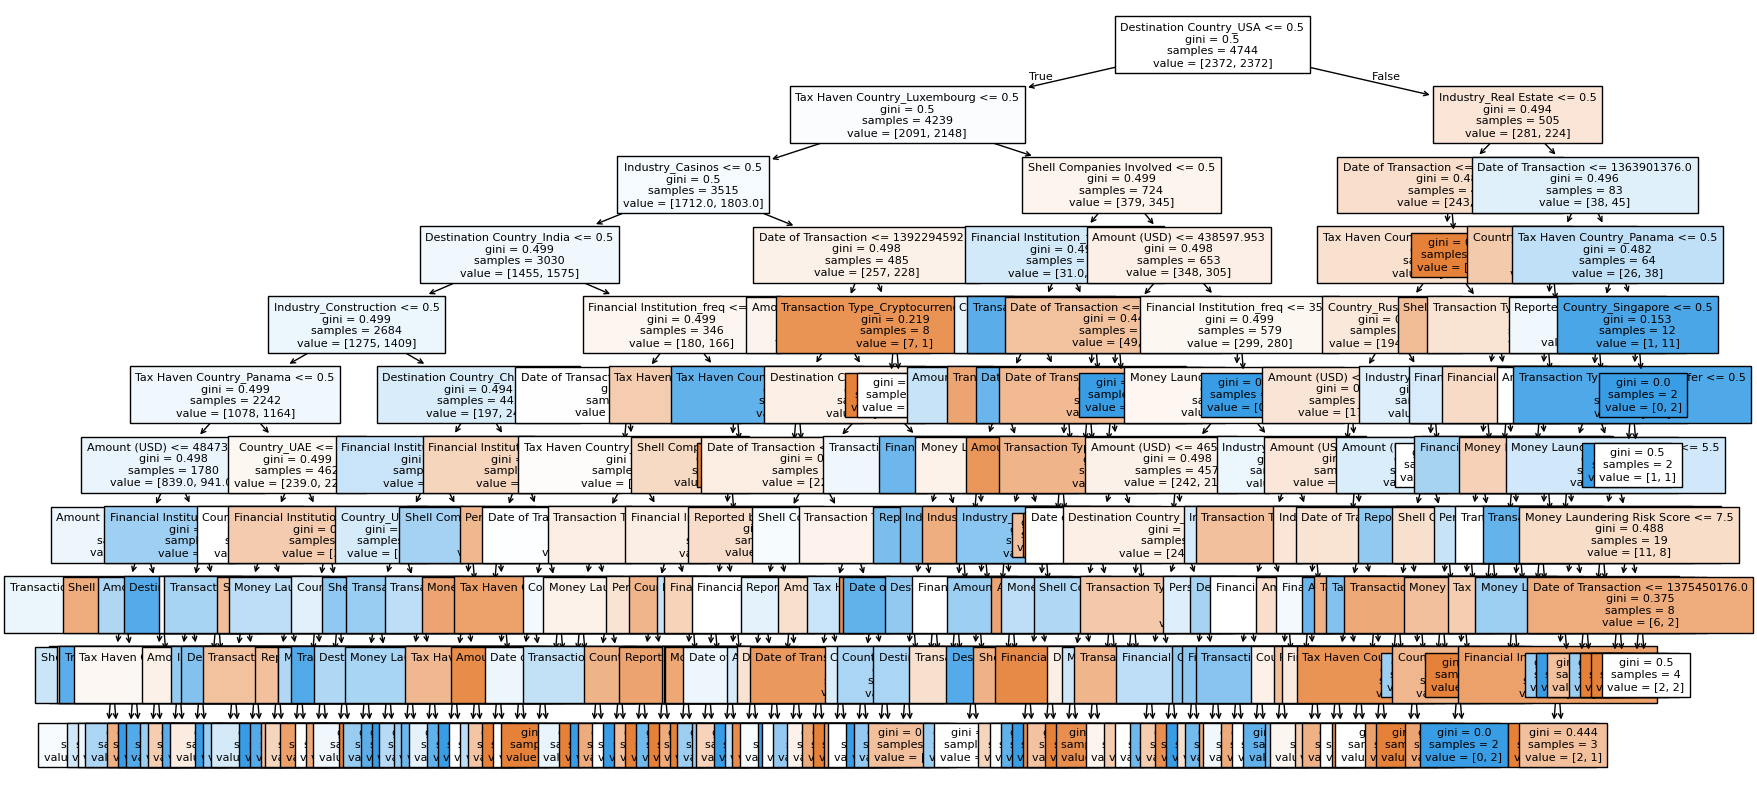

In [41]:
tree_graph(dt_grid_search)

#### 8.2.3) RF

In [40]:
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True, False]
}
rf_grid_search, rf_before_f1, rf_before_accuracy, rf_before_recall, rf_before_precision, rf_before_roc_auc, rf_before_cm, rf_before_cr, rf_before_best_params = grid_searching(pipeline_rf, rf_param_grid, X_train, y_train, X_test, y_test)

C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Before feature selection Random Forest grid search best parameters: {'classifier__bootstrap': True, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Before feature selection Random Forest model preformance:
confusion_matrix:
[[733 656]
 [301 310]]
classification report:              precision    recall  f1-score   support

           0       0.71      0.53      0.61      1389
           1       0.32      0.51      0.39       611

    accuracy                           0.52      2000
   macro avg       0.51      0.52      0.50      2000
weighted avg       0.59      0.52      0.54      2000

accuracy:0.5215
f1:0.39315155358275206
recall:0.5073649754500819
precision:0.32091097308488614
roc_auc:0.5175413790137378
----------------------------------------------------


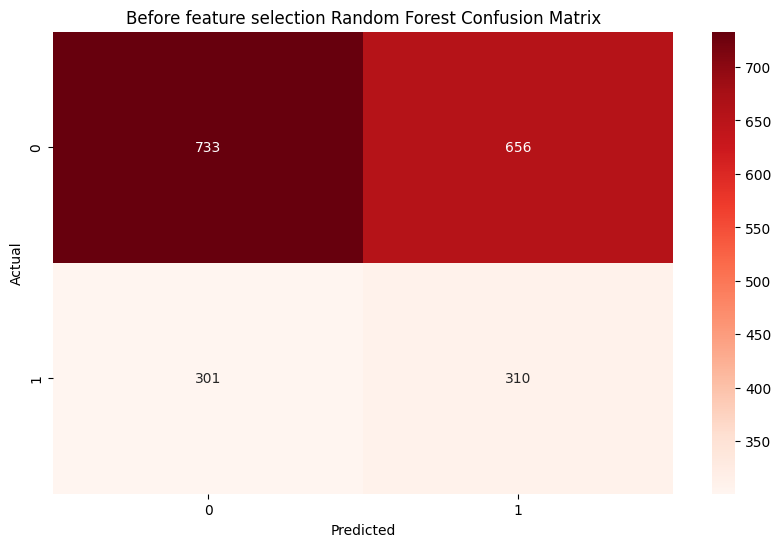

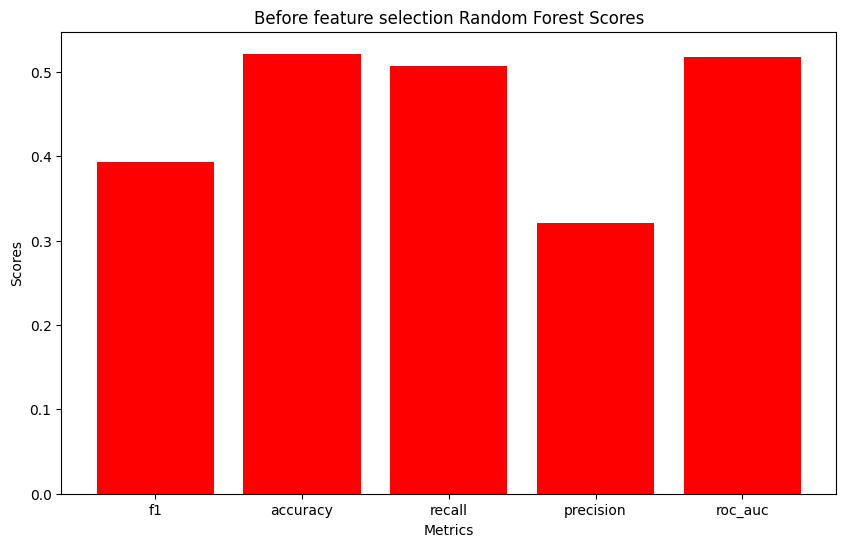

In [42]:
result_showing('Before feature selection Random Forest', rf_grid_search, rf_before_f1, rf_before_accuracy, rf_before_recall, rf_before_precision, rf_before_roc_auc, rf_before_cm, rf_before_cr, rf_before_best_params, color_heatmap[2], color_bar[2])

C:\Users\ericr\AppData\Local\Temp\ipykernel_31768\3720094806.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')


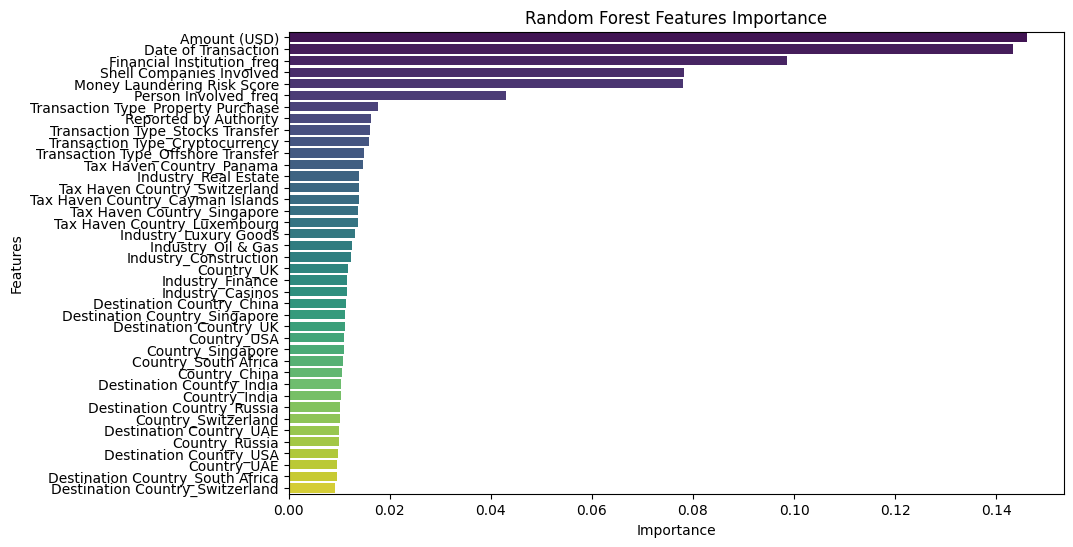

In [43]:
features_importance_tree('Random Forest', rf_grid_search, X_train)


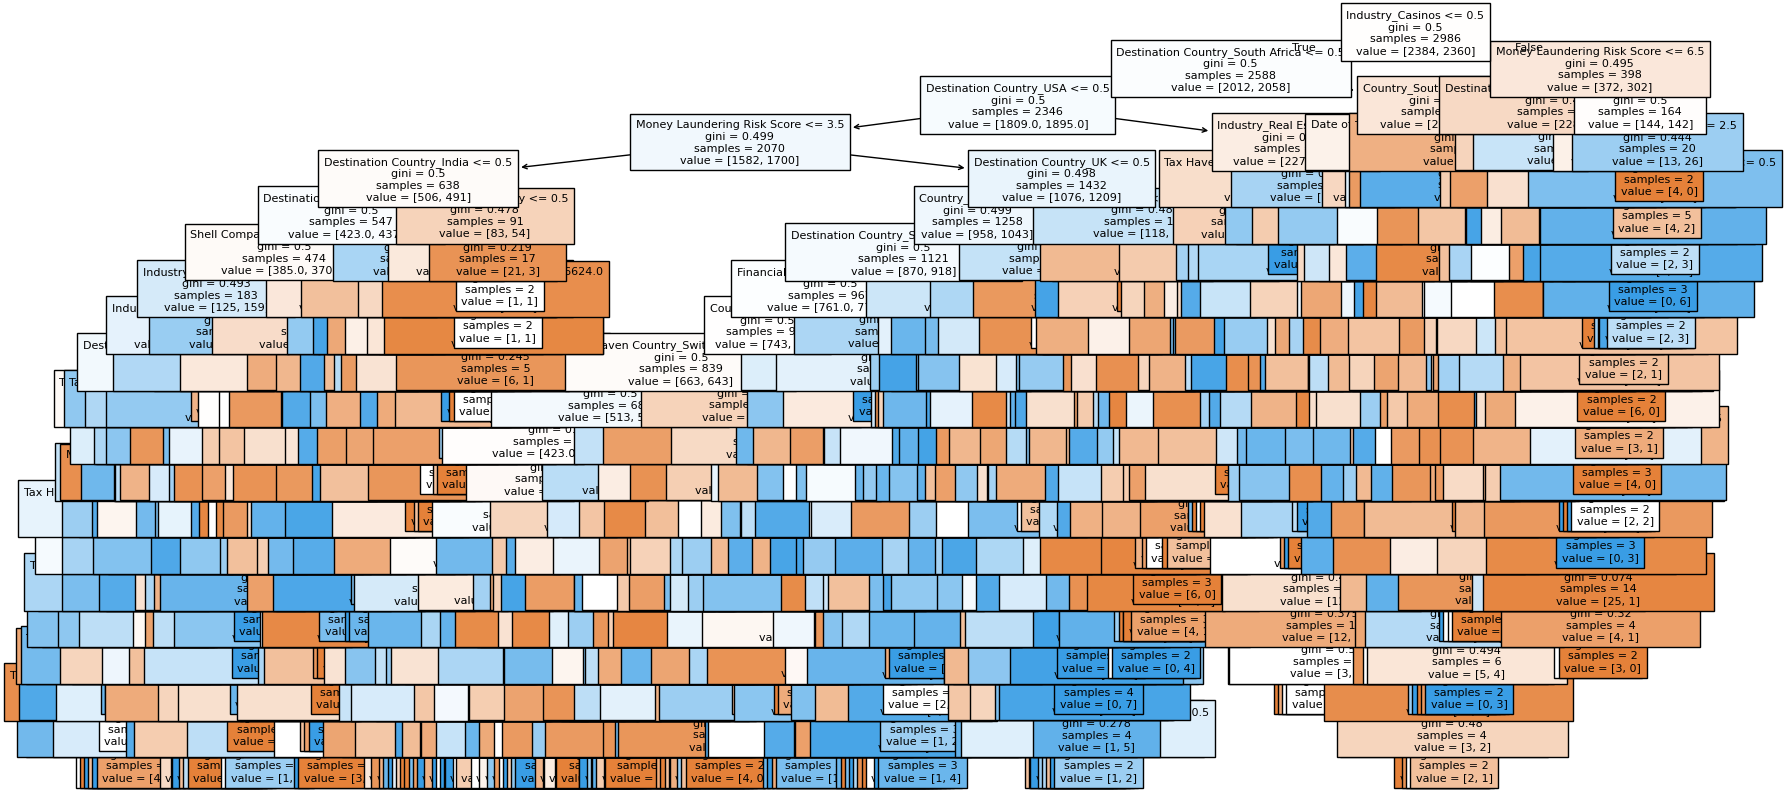

In [44]:
#show the tree graph
plt.figure(figsize=(20, 10))
plot_tree(rf_grid_search.best_estimator_['classifier'].estimators_[0], feature_names=X.columns, filled=True, fontsize=8)
plt.show()


#### 8.2.4) SVM

In [45]:
svm_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['rbf'],
    'classifier__gamma': [1,0.1,0.01,0.001,0.0001]
}
svc_grid_search, svc_before_f1, svc_before_accuracy, svc_before_recall, svc_before_precision, svc_before_roc_auc, svc_before_cm, svc_before_cr, svc_before_best_params = grid_searching(pipeline_svc, svm_param_grid, X_train, y_train, X_test, y_test)


C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Before feature selection SVC grid search best parameters: {'classifier__C': 0.1, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
Before feature selection SVC model preformance:
confusion_matrix:
[[   0 1389]
 [   0  611]]
classification report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1389
           1       0.31      1.00      0.47       611

    accuracy                           0.31      2000
   macro avg       0.15      0.50      0.23      2000
weighted avg       0.09      0.31      0.14      2000

accuracy:0.3055
f1:0.46801991574109536
recall:1.0
precision:0.3055
roc_auc:0.5
----------------------------------------------------


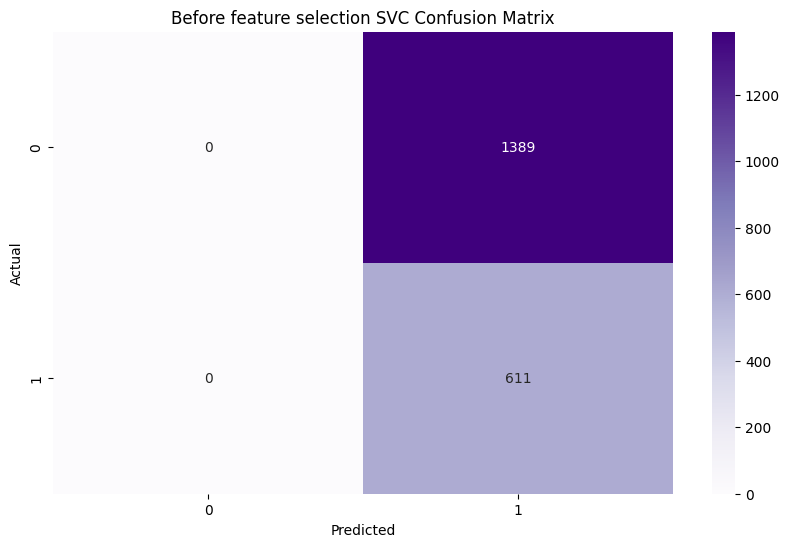

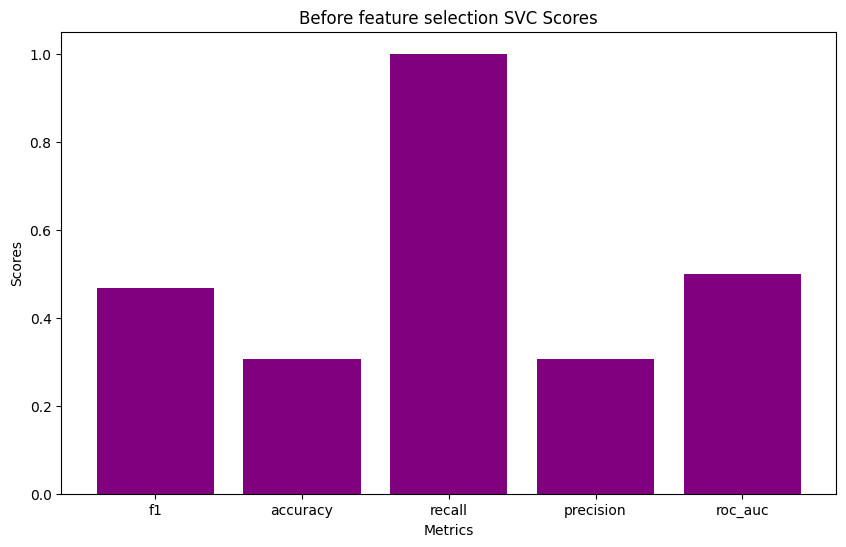

In [46]:
result_showing('Before feature selection SVC', svc_grid_search, svc_before_f1, svc_before_accuracy, svc_before_recall, svc_before_precision, svc_before_roc_auc, svc_before_cm, svc_before_cr, svc_before_best_params, color_heatmap[3], color_bar[3])

Model: Pipeline(steps=[('undersample', RandomUnderSampler(random_state=42)),
                ('classifier', SVC(C=0.1, gamma=1, random_state=42))])
X shape: (2000, 40)
y shape: (2000,)
Permutation importances: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\ericr\AppData\Local\Temp\ipykernel_31768\3720094806.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')


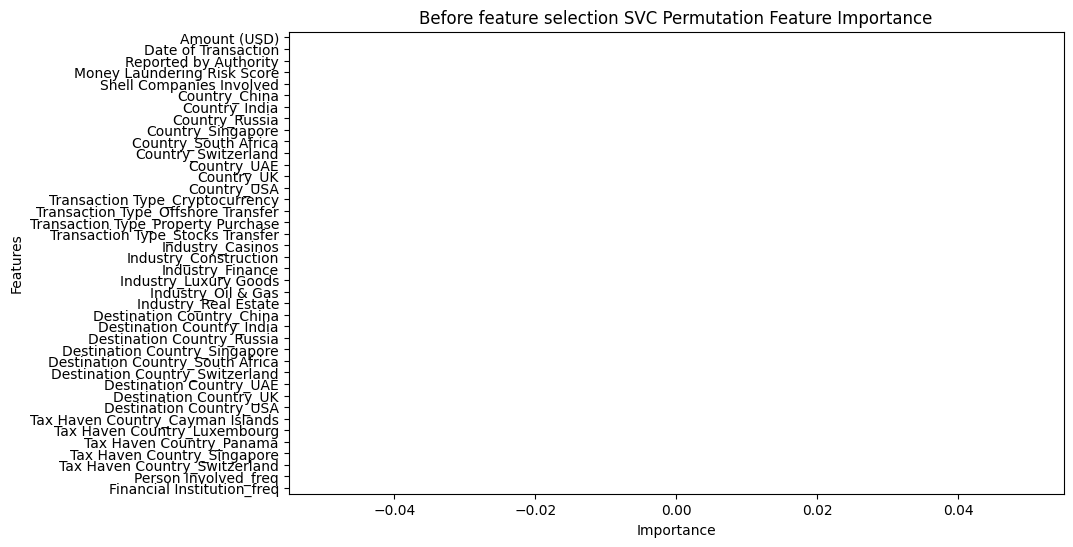

In [47]:
permutation_feature_importance('Before feature selection SVC', svc_grid_search, X_test, y_test)

#### 8.2.5) SGD

In [48]:
sgd_param_grid = {
    'classifier__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'classifier__penalty': ['l2', 'l1', 'elasticnet'],
    'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],
    'classifier__learning_rate': ['optimal', 'invscaling', 'adaptive'],
    'classifier__eta0': [0.01, 0.1, 1.0]
}
sgd_grid_search, sgd_before_f1, sgd_before_accuracy, sgd_before_recall, sgd_before_precision, sgd_before_roc_auc, sgd_before_cm, sgd_before_cr, sgd_before_best_params = grid_searching(pipeline_sgd, sgd_param_grid, X_train, y_train, X_test, y_test)

C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-p

Before feature selection SGD grid search best parameters: {'classifier__alpha': 0.0001, 'classifier__eta0': 0.1, 'classifier__learning_rate': 'invscaling', 'classifier__loss': 'hinge', 'classifier__penalty': 'elasticnet'}
Before feature selection SGD model preformance:
confusion_matrix:
[[   0 1389]
 [   0  611]]
classification report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1389
           1       0.31      1.00      0.47       611

    accuracy                           0.31      2000
   macro avg       0.15      0.50      0.23      2000
weighted avg       0.09      0.31      0.14      2000

accuracy:0.3055
f1:0.46801991574109536
recall:1.0
precision:0.3055
roc_auc:0.5
----------------------------------------------------


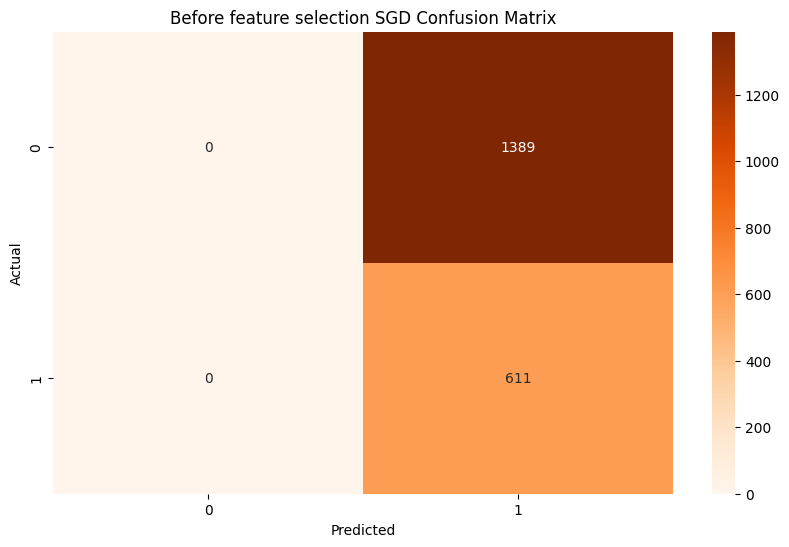

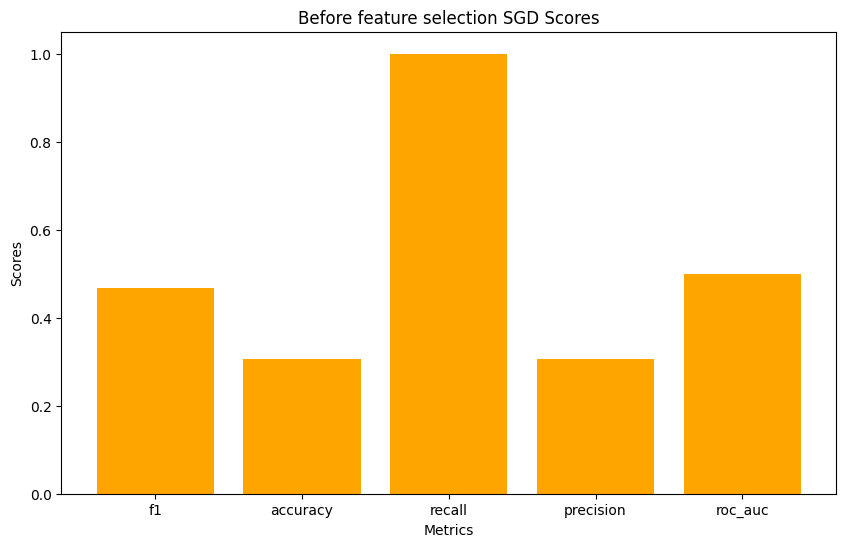

In [49]:
result_showing('Before feature selection SGD', sgd_grid_search, sgd_before_f1, sgd_before_accuracy, sgd_before_recall, sgd_before_precision, sgd_before_roc_auc, sgd_before_cm, sgd_before_cr, sgd_before_best_params, color_heatmap[4], color_bar[4])


Model: Pipeline(steps=[('undersample', RandomUnderSampler(random_state=42)),
                ('classifier',
                 SGDClassifier(eta0=0.1, learning_rate='invscaling',
                               penalty='elasticnet', random_state=42))])
X shape: (2000, 40)
y shape: (2000,)
Permutation importances: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\ericr\AppData\Local\Temp\ipykernel_31768\3720094806.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')


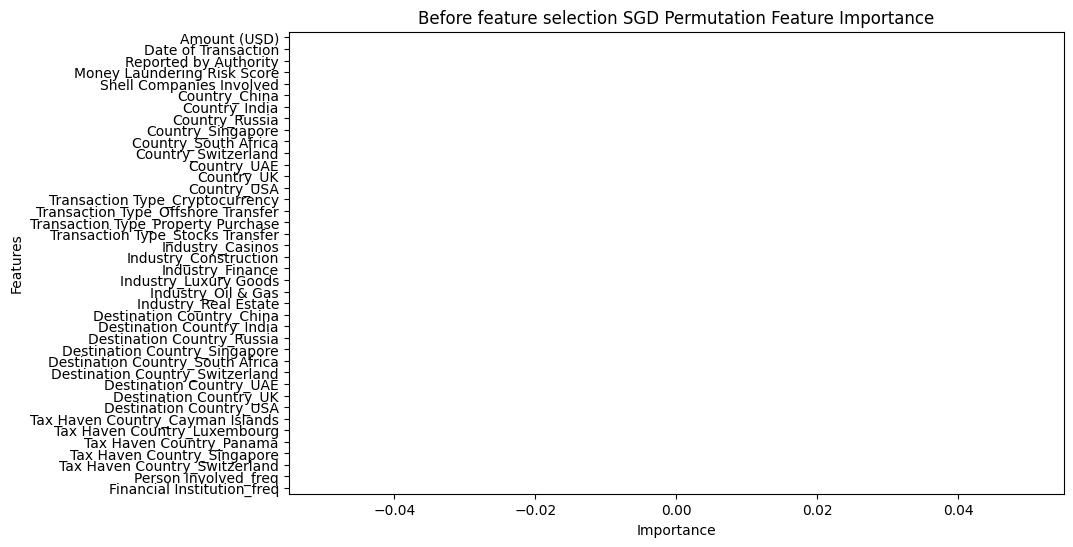

In [50]:
permutation_feature_importance('Before feature selection SGD', sgd_grid_search, X_test, y_test)

### 8.3.) Feature selection


In [51]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

#Feature Selection
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    for i in feature_name:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

def chi_squared_selector(X, y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:,chi_support].columns.tolist()
    return chi_support, chi_feature

def rfe_selector(X, y, num_feats):
    rfe_selector = RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=num_feats, step=10, verbose=5)
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.support_
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    return rfe_support, rfe_feature

def embedded_log_reg_selector(X, y, num_feats):
    embedded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", random_state = 42), max_features=num_feats)
    embedded_lr_selector.fit(X, y)
    embedded_lr_support = embedded_lr_selector.get_support()
    embedded_lr_feature = X.loc[:,embedded_lr_support].columns.tolist()
    return embedded_lr_support, embedded_lr_feature

def embedded_rf_selector(X, y, num_feats):
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=num_feats)
    embeded_rf_selector.fit(X, y)
    embedded_rf_support = embeded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:,embedded_rf_support].columns.tolist()
    return embedded_rf_support, embedded_rf_feature

def embedded_lgbm_selector(X, y, num_feats):
    lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2, reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
    embeded_lgbm_selector = SelectFromModel(lgbc, max_features=num_feats)
    embeded_lgbm_selector.fit(X, y)
    embedded_lgbm_support = embeded_lgbm_selector.get_support()
    embedded_lgbm_feature = X.loc[:,embedded_lgbm_support].columns.tolist()
    return embedded_lgbm_support, embedded_lgbm_feature

#Voting method
def autoFeatureSelector(X, y, num_feats, methods=[]):
    # Run every method we outlined above from the methods list and collect returned best features from every method
    if 'pearson' in methods:
        cor_support, cor_feature = cor_selector(X, y,num_feats)
    if 'chi-square' in methods:
        chi_support, chi_feature = chi_squared_selector(X, y,num_feats)
    if 'rfe' in methods:
        rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
    if 'log-reg' in methods:
        embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
    if 'rf' in methods:
        embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
    if 'lgbm' in methods:
        embedded_lgbm_support, embedded_lgbm_feature = embedded_lgbm_selector(X, y, num_feats)

    feature_name = list(X.columns)
    print("Combining all methods")
    feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embedded_lr_support,
                                    'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgbm_support})
    feature_selection_df['Total'] = feature_selection_df.apply(lambda row: np.sum(row[1:].astype(int)), axis=1)
    print("Sorting features")
    feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
    feature_selection_df.index = range(1, len(feature_selection_df)+1)
    print("Selecting best features")
    best_features = feature_selection_df['Feature'].tolist()[:num_feats]

    return best_features, feature_selection_df

In [52]:
df_name, df_ = ('df_Encode', df_Encode)
X = df_.drop('Source of Money', axis=1)
y = df_['Source of Money']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_feats = 36 #based on the screen plot
methods = ['pearson', 'chi-square', 'rfe', 'log-reg', 'rf', 'lgbm']
best_features, feature_selection_df = autoFeatureSelector(X_train, y_train, num_feats, methods)

Fitting estimator with 40 features.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2372, number of negative: 5628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.296500 -> initscore=-0.864021
[LightGBM] [Info] Start training from score -0.864021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [53]:
print(f'Best Features: {best_features}')
feature_selection_df

Best Features: ['Date of Transaction', 'Amount (USD)', 'Shell Companies Involved', 'Person Involved_freq', 'Money Laundering Risk Score', 'Transaction Type_Stocks Transfer', 'Transaction Type_Property Purchase', 'Transaction Type_Offshore Transfer', 'Tax Haven Country_Switzerland', 'Tax Haven Country_Singapore', 'Tax Haven Country_Panama', 'Tax Haven Country_Luxembourg', 'Tax Haven Country_Cayman Islands', 'Reported by Authority', 'Industry_Real Estate', 'Industry_Oil & Gas', 'Industry_Luxury Goods', 'Industry_Finance', 'Industry_Construction', 'Industry_Casinos', 'Financial Institution_freq', 'Destination Country_USA', 'Destination Country_UK', 'Destination Country_UAE', 'Destination Country_Switzerland', 'Destination Country_South Africa', 'Destination Country_India', 'Destination Country_China', 'Country_USA', 'Country_UK', 'Country_UAE', 'Country_Switzerland', 'Country_South Africa', 'Country_Singapore', 'Country_Russia', 'Country_China']


Feature  Pearson  Chi-2    RFE  Logistics  \
1                  Date of Transaction     True   True   True       True   
2                         Amount (USD)     True   True   True       True   
3             Shell Companies Involved     True   True   True      False   
4                 Person Involved_freq     True   True   True      False   
5          Money Laundering Risk Score     True   True   True      False   
6     Transaction Type_Stocks Transfer     True   True   True      False   
7   Transaction Type_Property Purchase     True   True   True      False   
8   Transaction Type_Offshore Transfer     True   True   True      False   
9        Tax Haven Country_Switzerland     True   True   True      False   
10         Tax Haven Country_Singapore     True   True   True      False   
11            Tax Haven Country_Panama     True   True   True      False   
12        Tax Haven Country_Luxembourg     True   True   True      False   
13    Tax Haven Country_Cayman Islands     True   True   True      False   
14               Reported by Authority     True   True   True      False   
15                Industry_Real Estate     True   True   True      False   
16                  Industry_Oil & Gas     True   True   True      False   
17               Industry_Luxury Goods     True   True   True      False   
18                    Industry_Finance     True   True   True      False   
19               Industry_Construction     True   True   True      False   
20                    Industry_Casinos     True   True   True      False   
21          Financial Institution_freq    False  False   True      False   
22             Destination Country_USA     True   True   True      False   
23              Destination Country_UK     True   True   True      False   
24             Destination Country_UAE     True   True   True      False   
25     Destination Country_Switzerland     True   True   True      False   
26    Destination Country_South Africa     True   True   True      False   
27           Destination Country_India     True   True   True      False   
28           Destination Country_China     True   True   True      False   
29                         Country_USA     True   True   True      False   
30                          Country_UK     True   True   True      False   
31                         Country_UAE     True   True   True      False   
32                 Country_Switzerland     True   True   True      False   
33                Country_South Africa     True   True   True      False   
34                   Country_Singapore     True   True   True      False   
35                      Country_Russia     True   True   True      False   
36                       Country_China     True   True   True      False   
37       Destination Country_Singapore     True   True  False      False   
38     Transaction Type_Cryptocurrency    False  False  False      False   
39          Destination Country_Russia    False  False  False      False   
40                       Country_India    False  False  False      False   

    Random Forest  LightGBM  Total  
1            True      True      6  
2            True      True      6  
3            True      True      5  
4            True      True      5  
5            True      True      5  
6           False     False      3  
7           False     False      3  
8           False     False      3  
9           False     False      3  
10          False     False      3  
11          False     False      3  
12          False     False      3  
13          False     False      3  
14          False     False      3  
15          False     False      3  
16          False     False      3  
17          False     False      3  
18          False     False      3  
19          False     False      3  
20          False     False      3  
21           True      True      3  
22          False     False      3  
23          False     False      3  
24          False     Fals

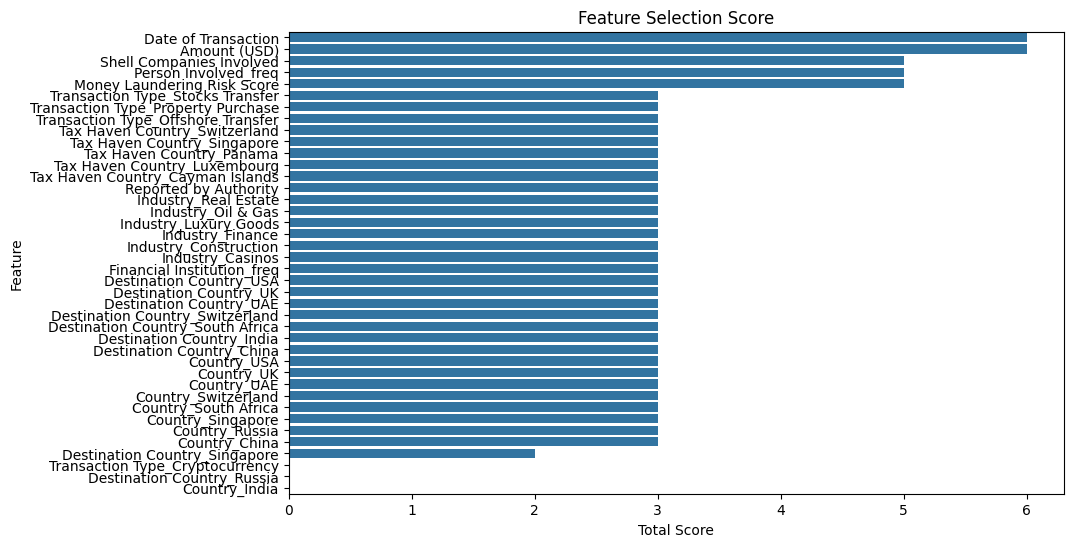

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Feature', data=feature_selection_df)
plt.xlabel('Total Score')
plt.ylabel('Feature')
plt.title('Feature Selection Score')
plt.show()

## 8.4.) Second grid search (with selected features)

In [55]:
X = df_Encode.drop('Source of Money', axis=1)
y = df_Encode['Source of Money']
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X[best_features], y, test_size=0.2, random_state=42)

### 8.4.1) LR

In [56]:
lr_grid_search_fs, lr_after_f1, lr_after_accuracy, lr_after_recall, lr_after_precision, lr_after_roc_auc, lr_after_cm, lr_after_cr, lr_after_best_params = grid_searching(pipeline_lr, lr_param_grid, X_train_fs, y_train_fs, X_test_fs, y_test_fs)

C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


After feature selection Logistic Regression grid search best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
After feature selection Logistic Regression model preformance:
confusion_matrix:
[[705 684]
 [281 330]]
classification report:              precision    recall  f1-score   support

           0       0.72      0.51      0.59      1389
           1       0.33      0.54      0.41       611

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.50      2000
weighted avg       0.60      0.52      0.54      2000

accuracy:0.5175
f1:0.40615384615384614
recall:0.5400981996726678
precision:0.3254437869822485
roc_auc:0.5238287974605239
----------------------------------------------------


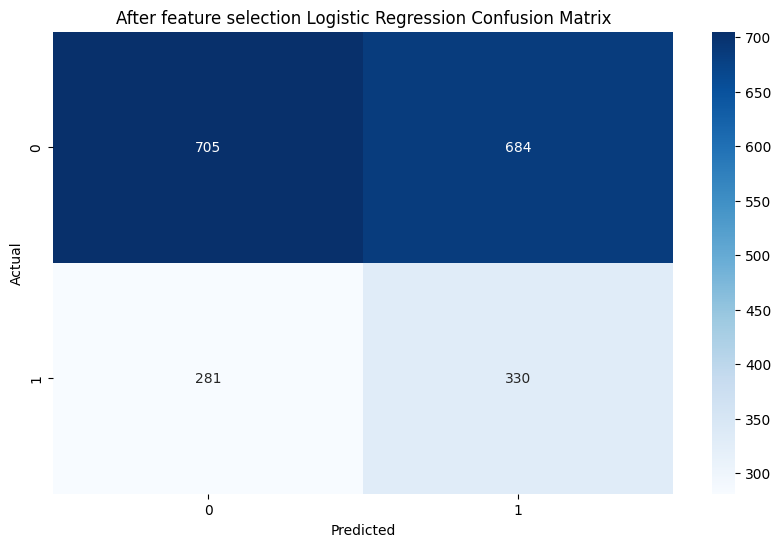

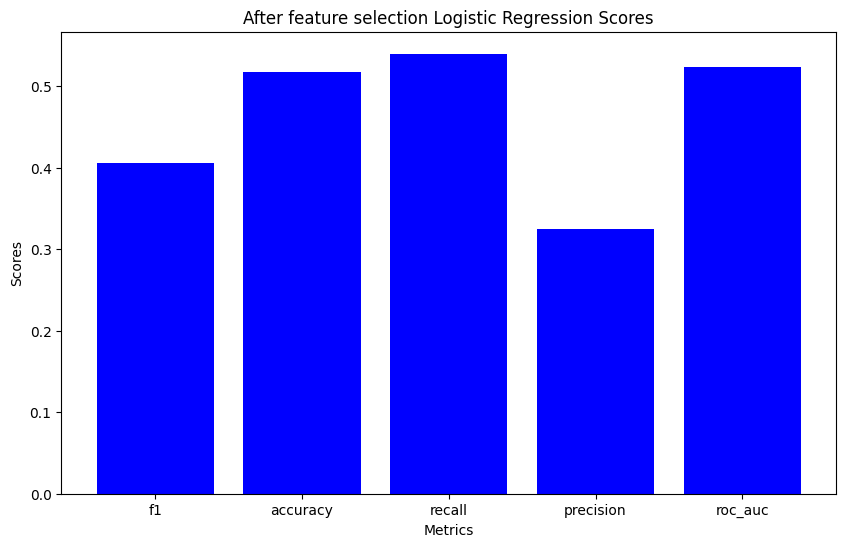

In [57]:
result_showing('After feature selection Logistic Regression', lr_grid_search_fs, lr_after_f1, lr_after_accuracy, lr_after_recall, lr_after_precision, lr_after_roc_auc, lr_after_cm, lr_after_cr, lr_after_best_params, color_heatmap[0], color_bar[0])

Model: Pipeline(steps=[('undersample', RandomUnderSampler(random_state=42)),
                ('classifier',
                 LogisticRegression(C=0.01, penalty='l1', random_state=42,
                                    solver='saga'))])
X shape: (2000, 36)
y shape: (2000,)
Permutation importances: [0.00065 0.02235 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.     ]


C:\Users\ericr\AppData\Local\Temp\ipykernel_31768\3720094806.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')


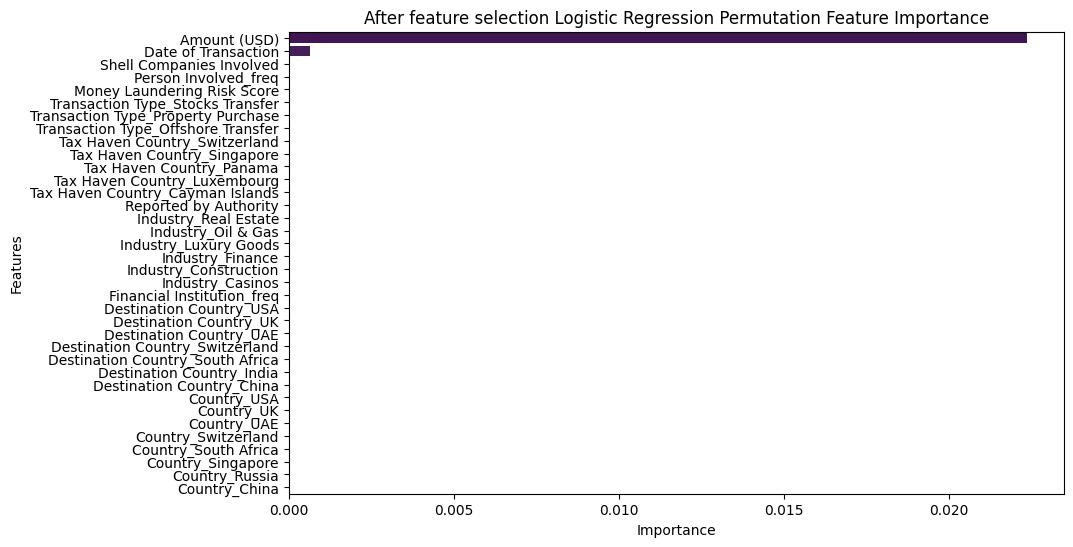

In [58]:
permutation_feature_importance('After feature selection Logistic Regression', lr_grid_search_fs, X_test_fs, y_test_fs)

### 8.4.2) RF

In [59]:
rf_grid_search_fs, rf_after_f1, rf_after_accuracy, rf_after_recall, rf_after_precision, rf_after_roc_auc, rf_after_cm, rf_after_cr, rf_after_best_params = grid_searching(pipeline_rf, rf_param_grid, X_train_fs, y_train_fs, X_test_fs, y_test_fs)

After feature selection Random Forest grid search best parameters: {'classifier__bootstrap': True, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
After feature selection Random Forest model preformance:
confusion_matrix:
[[717 672]
 [309 302]]
classification report:              precision    recall  f1-score   support

           0       0.70      0.52      0.59      1389
           1       0.31      0.49      0.38       611

    accuracy                           0.51      2000
   macro avg       0.50      0.51      0.49      2000
weighted avg       0.58      0.51      0.53      2000

accuracy:0.5095
f1:0.3810725552050473
recall:0.49427168576104746
precision:0.31006160164271046
roc_auc:0.5052351949323596
----------------------------------------------------


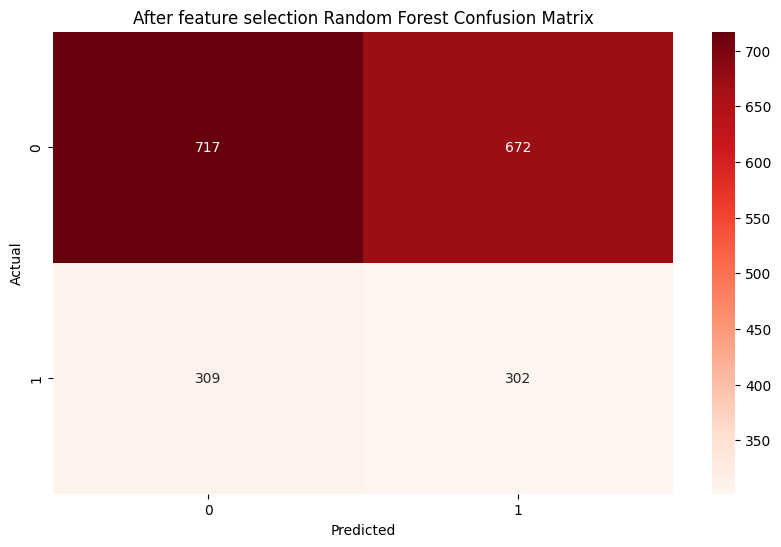

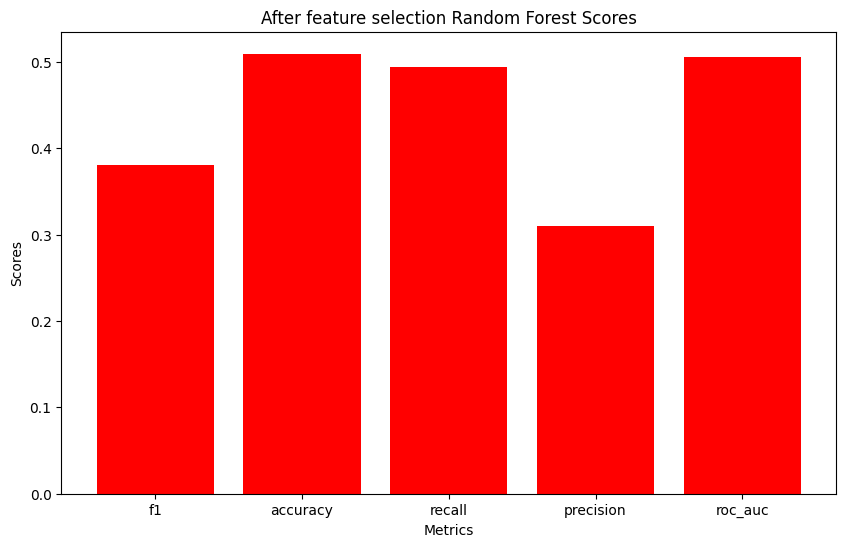

In [60]:
result_showing('After feature selection Random Forest', rf_grid_search_fs, rf_after_f1, rf_after_accuracy, rf_after_recall, rf_after_precision, rf_after_roc_auc, rf_after_cm, rf_after_cr, rf_after_best_params, color_heatmap[2], color_bar[2])

C:\Users\ericr\AppData\Local\Temp\ipykernel_31768\3720094806.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')


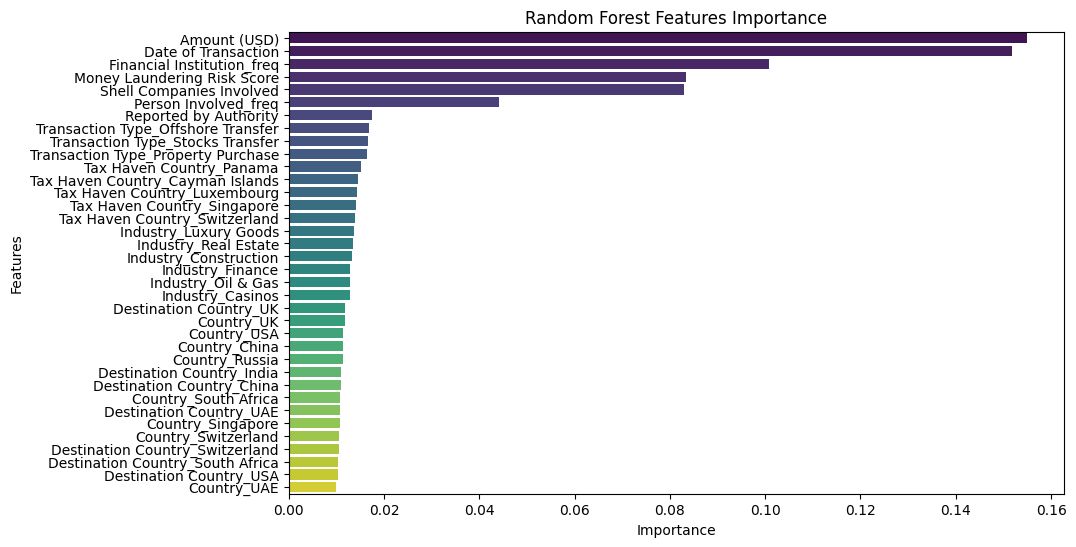

In [61]:
#show the weight of the feature
features_importance_tree('Random Forest', rf_grid_search_fs, X_train_fs)

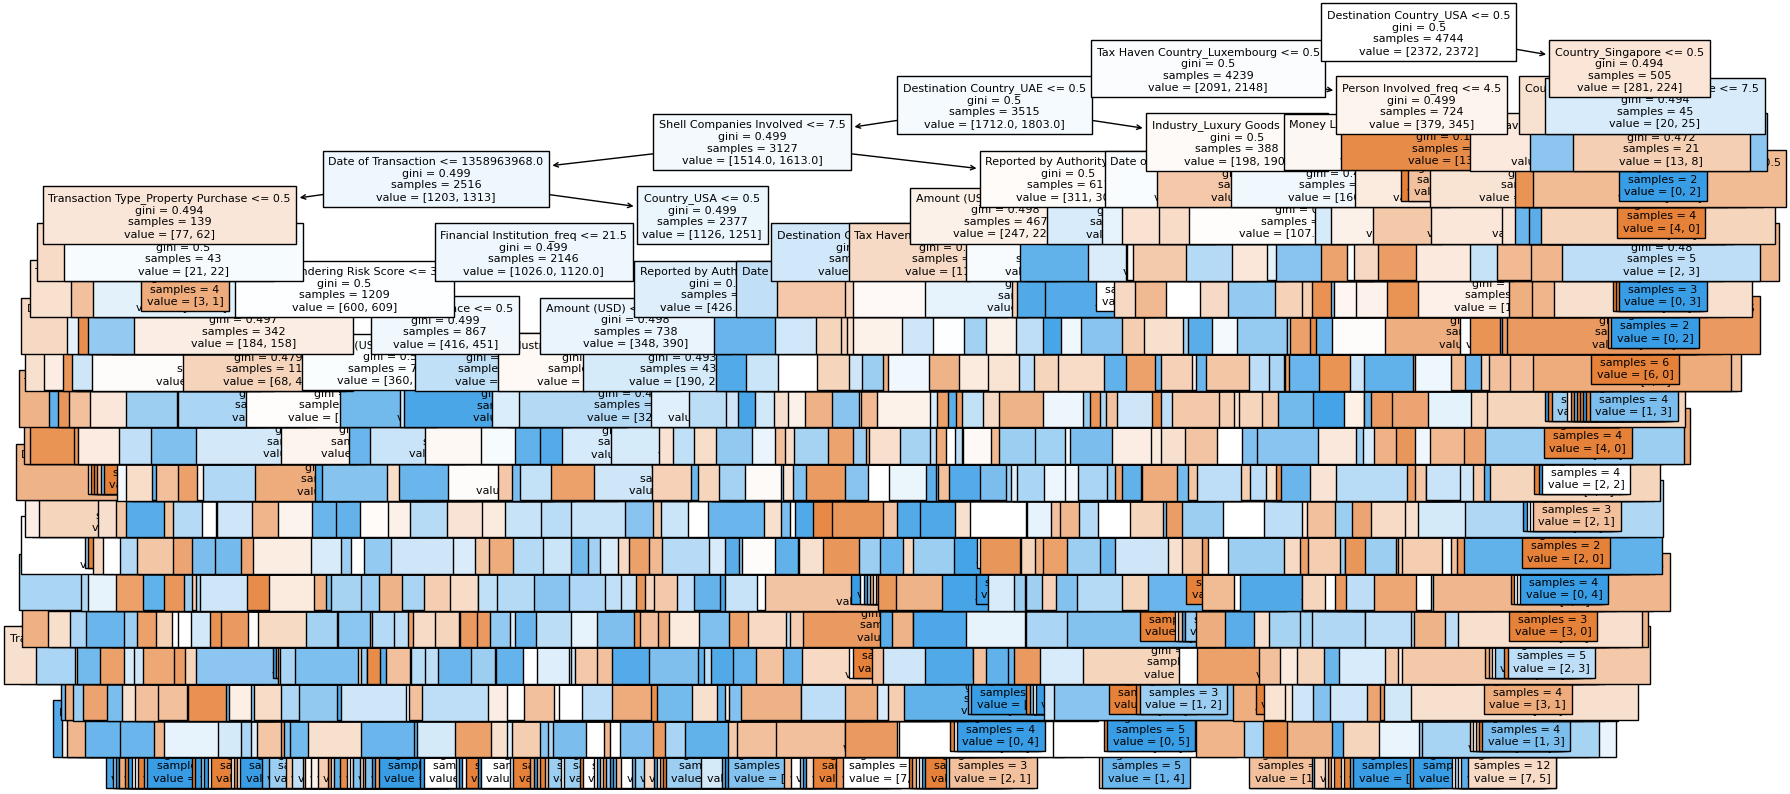

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(rf_grid_search_fs.best_estimator_['classifier'].estimators_[0], feature_names=X_train_fs.columns, filled=True, fontsize=8)
plt.show()

### 8.4.3) DT

In [62]:
dt_grid_search_fs, dt_after_f1, dt_after_accuracy, dt_after_recall, dt_after_precision, dt_after_roc_auc, dt_after_cm, dt_after_cr, dt_after_best_params = grid_searching(pipeline_dt, dt_param_grid, X_train_fs, y_train_fs, X_test_fs, y_test_fs)

C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
990 fits failed out of a total of 2970.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
443 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

After feature selection Decision Tree grid search best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
After feature selection Decision Tree model preformance:
confusion_matrix:
[[602 787]
 [267 344]]
classification report:              precision    recall  f1-score   support

           0       0.69      0.43      0.53      1389
           1       0.30      0.56      0.39       611

    accuracy                           0.47      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.57      0.47      0.49      2000

accuracy:0.473
f1:0.3949483352468427
recall:0.563011456628478
precision:0.3041556145004421
roc_auc:0.49820839210113604
----------------------------------------------------


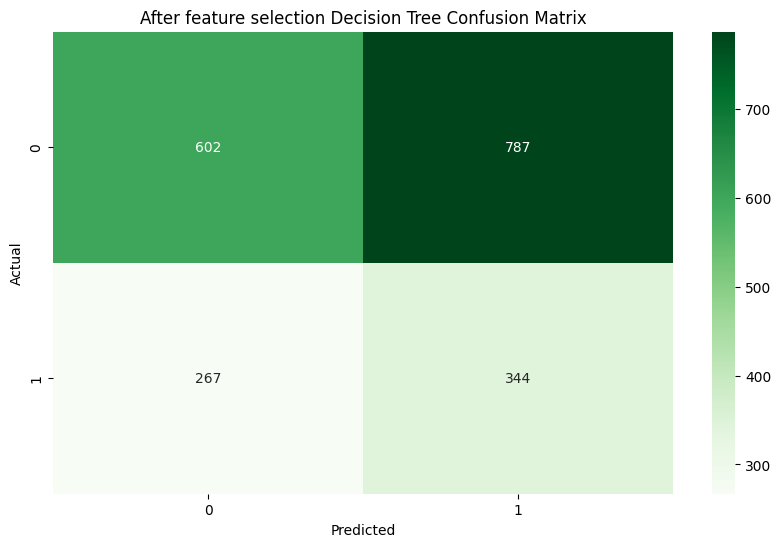

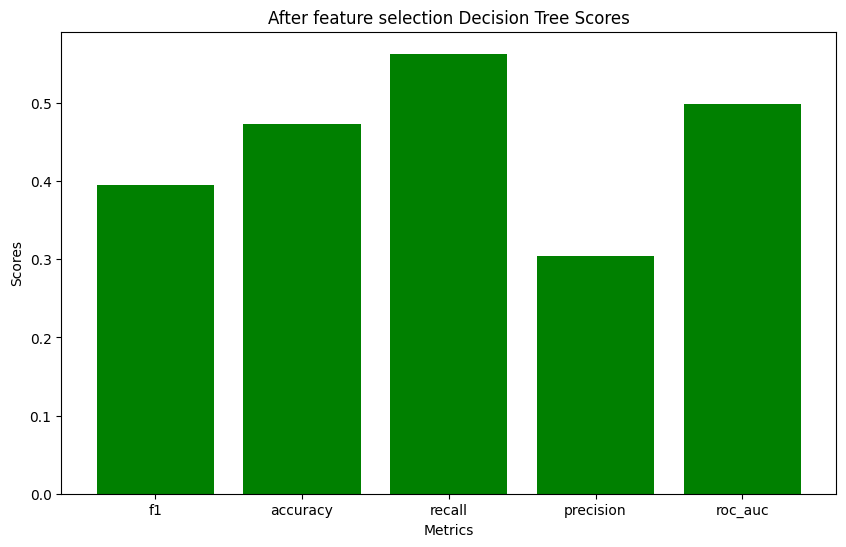

In [63]:
result_showing('After feature selection Decision Tree', dt_grid_search_fs, dt_after_f1, dt_after_accuracy, dt_after_recall, dt_after_precision, dt_after_roc_auc, dt_after_cm, dt_after_cr, dt_after_best_params, color_heatmap[1], color_bar[1])

C:\Users\ericr\AppData\Local\Temp\ipykernel_31768\3720094806.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')


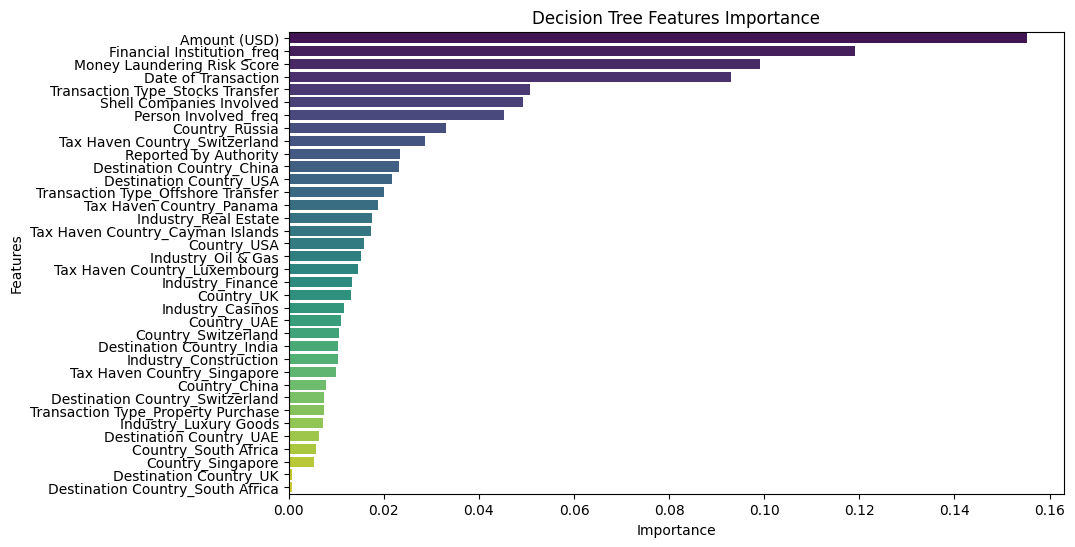

In [64]:
#show the weight of the feature
features_importance_tree('Decision Tree', dt_grid_search_fs, X_train_fs)

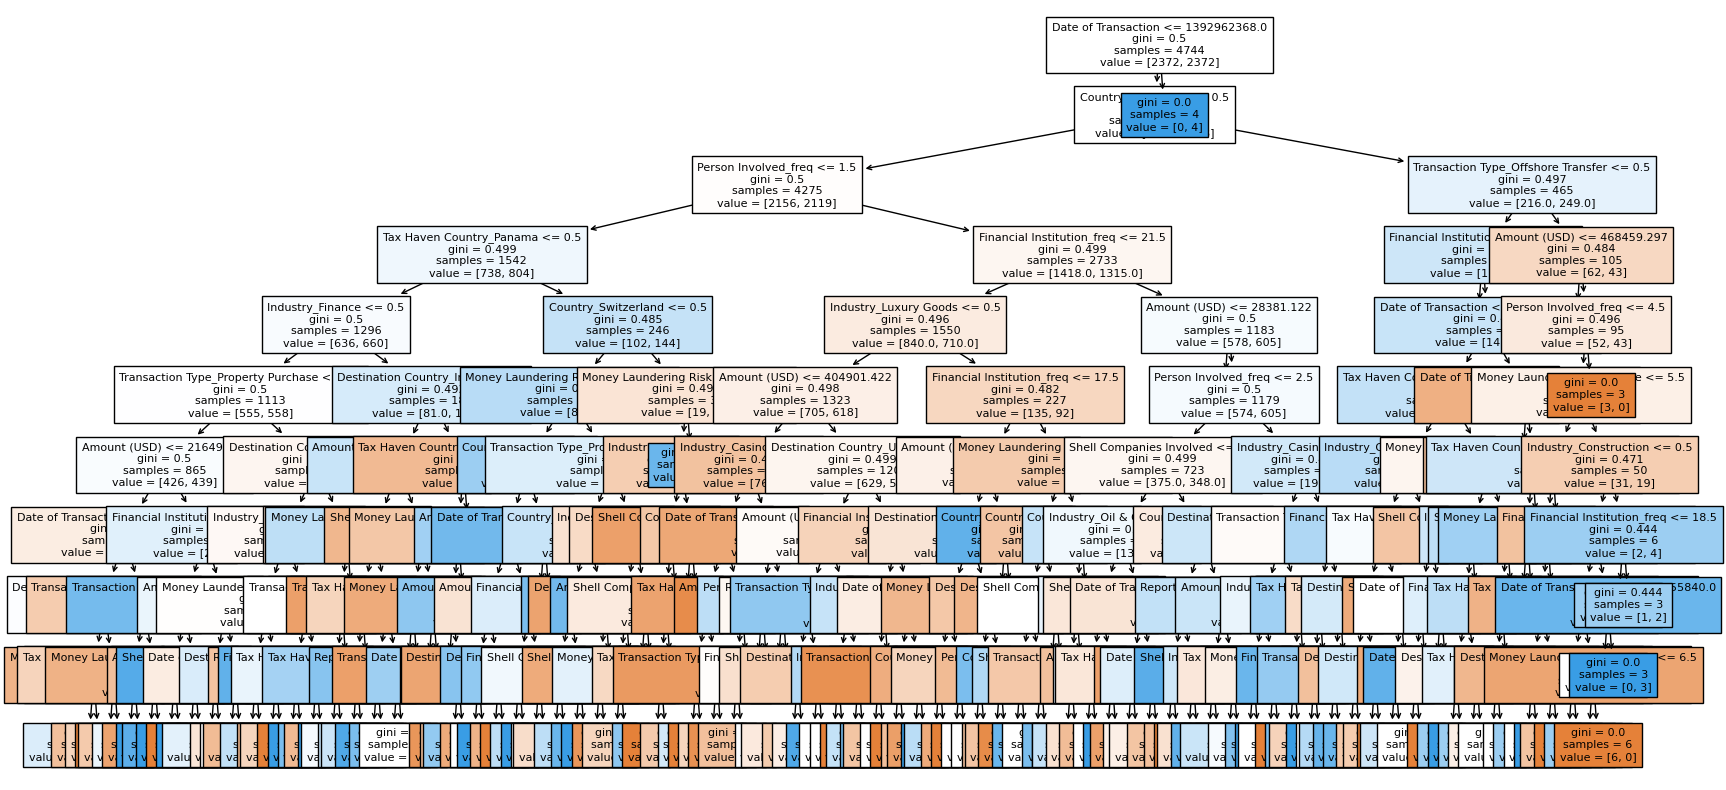

In [ ]:
#show the tree graph
plt.figure(figsize=(20, 10))
plot_tree(dt_grid_search_fs.best_estimator_['classifier'], feature_names=X_train_fs.columns, filled=True, fontsize=8)
plt.show()


### 8.4.4) SVM

In [65]:
svc_grid_search_fs, svc_after_f1, svc_after_accuracy, svc_after_recall, svc_after_precision, svc_after_roc_auc, svc_after_cm, svc_after_cr, svc_after_best_params = grid_searching(pipeline_svc, svm_param_grid, X_train_fs, y_train_fs, X_test_fs, y_test_fs)

C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

After feature selection SVC grid search best parameters: {'classifier__C': 0.1, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
After feature selection SVC model preformance:
confusion_matrix:
[[   0 1389]
 [   0  611]]
classification report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1389
           1       0.31      1.00      0.47       611

    accuracy                           0.31      2000
   macro avg       0.15      0.50      0.23      2000
weighted avg       0.09      0.31      0.14      2000

accuracy:0.3055
f1:0.46801991574109536
recall:1.0
precision:0.3055
roc_auc:0.5
----------------------------------------------------


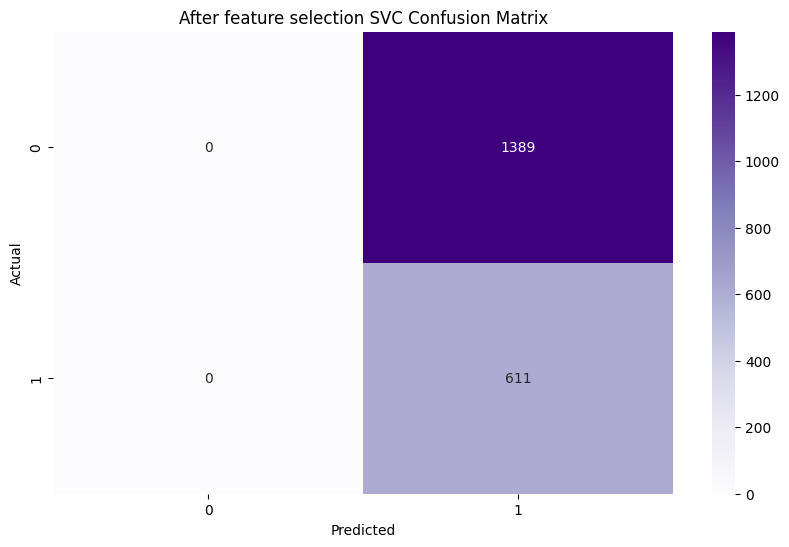

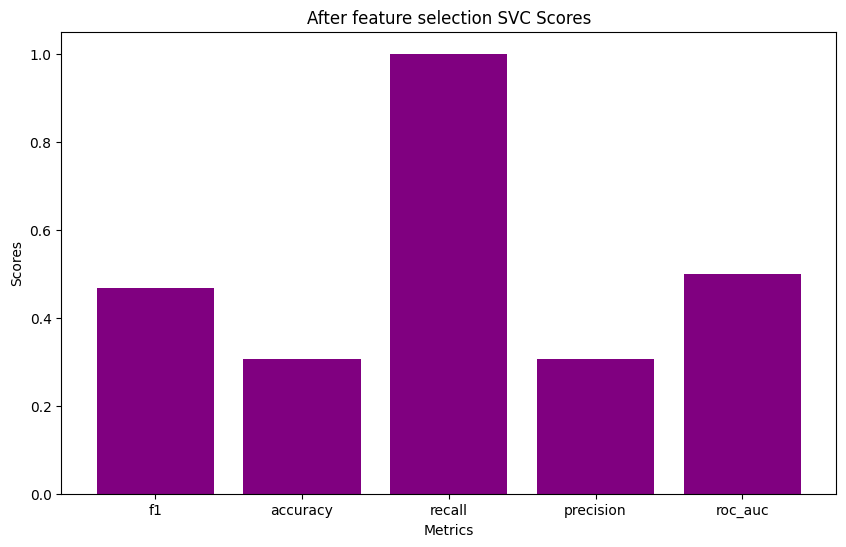

In [66]:
result_showing('After feature selection SVC', svc_grid_search_fs, svc_after_f1, svc_after_accuracy, svc_after_recall, svc_after_precision, svc_after_roc_auc, svc_after_cm, svc_after_cr, svc_after_best_params, color_heatmap[3], color_bar[3])

Model: Pipeline(steps=[('undersample', RandomUnderSampler(random_state=42)),
                ('classifier',
                 LogisticRegression(C=0.01, penalty='l1', random_state=42,
                                    solver='saga'))])
X shape: (2000, 36)
y shape: (2000,)
Permutation importances: [0.00065 0.02235 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.     ]


C:\Users\ericr\AppData\Local\Temp\ipykernel_31768\3720094806.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')


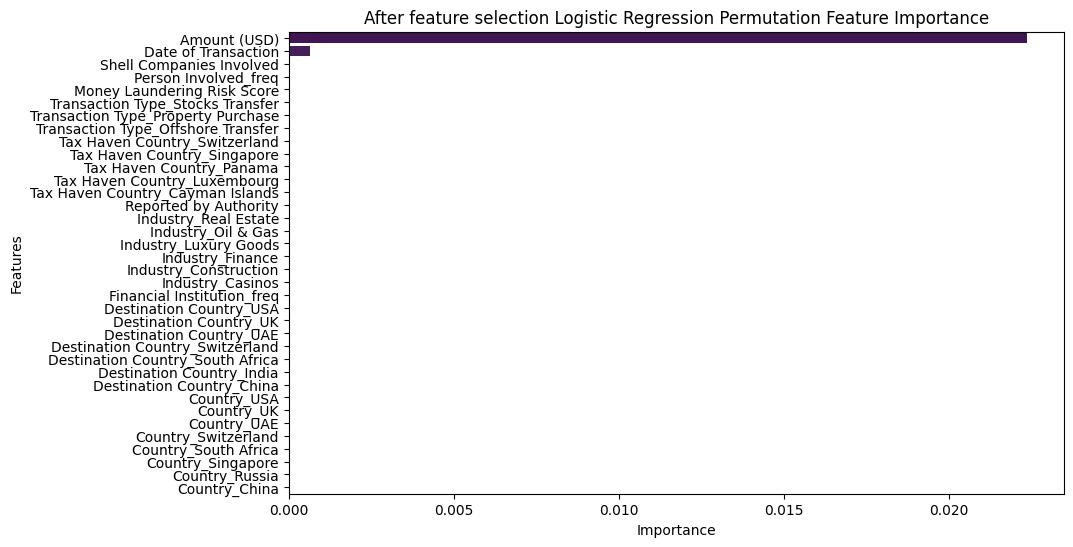

In [67]:
permutation_feature_importance('After feature selection Logistic Regression', lr_grid_search_fs, X_test_fs, y_test_fs)

### 8.4.5) SGD

In [68]:
sgd_grid_search_fs, sgd_after_f1, sgd_after_accuracy, sgd_after_recall, sgd_after_precision, sgd_after_roc_auc, sgd_after_cm, sgd_after_cr, sgd_after_best_params = grid_searching(pipeline_sgd, sgd_param_grid, X_train_fs, y_train_fs, X_test_fs, y_test_fs)

C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ericr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-p

After feature selection SGD grid search best parameters: {'classifier__alpha': 0.0001, 'classifier__eta0': 0.1, 'classifier__learning_rate': 'invscaling', 'classifier__loss': 'hinge', 'classifier__penalty': 'elasticnet'}
After feature selection SGD model preformance:
confusion_matrix:
[[   0 1389]
 [   0  611]]
classification report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1389
           1       0.31      1.00      0.47       611

    accuracy                           0.31      2000
   macro avg       0.15      0.50      0.23      2000
weighted avg       0.09      0.31      0.14      2000

accuracy:0.3055
f1:0.46801991574109536
recall:1.0
precision:0.3055
roc_auc:0.5
----------------------------------------------------


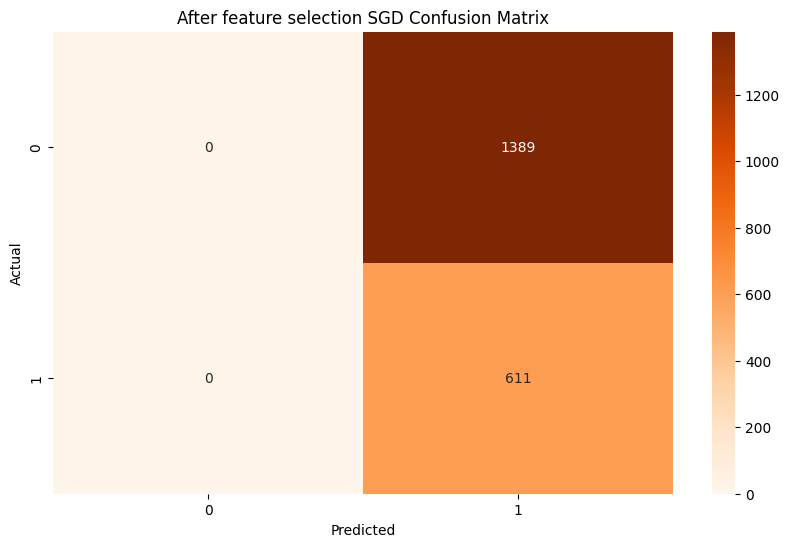

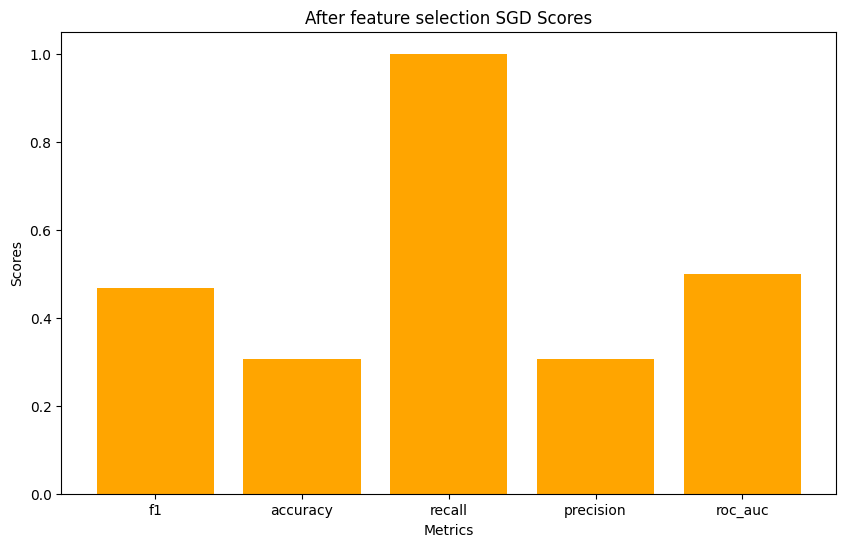

In [69]:
result_showing('After feature selection SGD', sgd_grid_search_fs, sgd_after_f1, sgd_after_accuracy, sgd_after_recall, sgd_after_precision, sgd_after_roc_auc, sgd_after_cm, sgd_after_cr, sgd_after_best_params, color_heatmap[4], color_bar[4])


Model: Pipeline(steps=[('undersample', RandomUnderSampler(random_state=42)),
                ('classifier',
                 LogisticRegression(C=0.01, penalty='l1', random_state=42,
                                    solver='saga'))])
X shape: (2000, 36)
y shape: (2000,)
Permutation importances: [0.00065 0.02235 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.     ]


C:\Users\ericr\AppData\Local\Temp\ipykernel_31768\3720094806.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df['Importance'], y=features_df.index, palette='viridis')


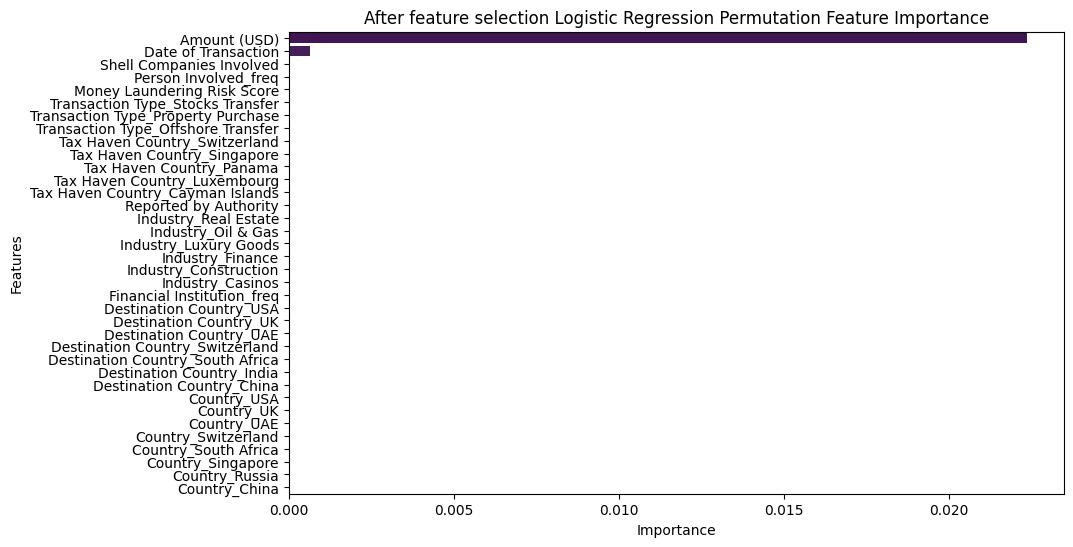

In [70]:
permutation_feature_importance('After feature selection Logistic Regression', lr_grid_search_fs, X_test_fs, y_test_fs)

## 9.) Comparison

In [72]:
#comparing baseline, before and after feature selection
print('Logistic Regression:')
print(f'Baseline f1: {lr_f1_list[4]}')
print(f'Before feature selection f1: {lr_before_f1}')
print(f'After feature selection f1: {lr_after_f1}')
print('----------------------------------------------------')
print('Random Forest:')
print(f'Baseline f1: {rf_f1_list[4]}')
print(f'Before feature selection f1: {rf_before_f1}')
print(f'After feature selection f1: {rf_after_f1}')
print('----------------------------------------------------')
print('Decision Tree:')
print(f'Baseline f1: {dt_f1_list[4]}')
print(f'Before feature selection f1: {dt_before_f1}')
print(f'After feature selection f1: {dt_after_f1}')
print('----------------------------------------------------')
print('SVC:')
print(f'Baseline f1: {svc_f1_list[4]}')
print(f'Before feature selection f1: {svc_before_f1}')
print(f'After feature selection f1: {svc_after_f1}')
print('----------------------------------------------------')
print('SGD:')
print(f'Baseline f1: {sgd_f1_list[4]}')
print(f'Before feature selection f1: {sgd_before_f1}')
print(f'After feature selection f1: {sgd_after_f1}')
print('----------------------------------------------------')
#recall
print('Logistic Regression:')
print(f'Baseline recall: {lr_recall_list[4]}')
print(f'Before feature selection recall: {lr_before_recall}')
print(f'After feature selection recall: {lr_after_recall}')
print('----------------------------------------------------')
print('Random Forest:')
print(f'Baseline recall: {rf_recall_list[4]}')
print(f'Before feature selection recall: {rf_before_recall}')
print(f'After feature selection recall: {rf_after_recall}')
print('----------------------------------------------------')
print('Decision Tree:')
print(f'Baseline recall: {dt_recall_list[4]}')
print(f'Before feature selection recall: {dt_before_recall}')
print(f'After feature selection recall: {dt_after_recall}')
print('----------------------------------------------------')
print('SVC:')
print(f'Baseline recall: {svc_recall_list[4]}')
print(f'Before feature selection recall: {svc_before_recall}')
print(f'After feature selection recall: {svc_after_recall}')
print('----------------------------------------------------')
print('SGD:')
print(f'Baseline recall: {sgd_recall_list[4]}')
print(f'Before feature selection recall: {sgd_before_recall}')
print(f'After feature selection recall: {sgd_after_recall}')


Logistic Regression:
Baseline f1: 0.38609112709832133
Before feature selection f1: 0.40615384615384614
After feature selection f1: 0.40615384615384614
----------------------------------------------------
Random Forest:
Baseline f1: 0.37637897469175857
Before feature selection f1: 0.39315155358275206
After feature selection f1: 0.3810725552050473
----------------------------------------------------
Decision Tree:
Baseline f1: 0.37407407407407406
Before feature selection f1: 0.4336569579288026
After feature selection f1: 0.3949483352468427
----------------------------------------------------
SVC:
Baseline f1: 0.3933002481389578
Before feature selection f1: 0.46801991574109536
After feature selection f1: 0.46801991574109536
----------------------------------------------------
SGD:
Baseline f1: 0.24066390041493776
Before feature selection f1: 0.46801991574109536
After feature selection f1: 0.46801991574109536
----------------------------------------------------
Logistic Regression:
Baselin

-------------------------------------------------------------------------------------------------